# Teen Phone Addictiton Classification

## Defining the problem

- Predict and classify teen phone addiction level.
- Target variable: Addiction_Level
- Data Visualisations using matplotlib
- Classification → categorical target
- Regression → numerical target

## Import required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

These are commonly used together in EDA:

- pandas → Load, clean, and process data.

- numpy → Perform calculations on numerical data.

- matplotlib → Create visualizations (histograms, bar charts, scatter plots, etc.).

# Import dataset

In [7]:
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


- pd.read_csv: Loads the CSV file into a pandas DataFrame called df.
- df.head(): Shows the first 5 rows of the dataset for a quick preview.
- Dataset is a csv file related to addiction level in teenagers.

# Display basic information of dataset

In [12]:
df.shape

(3000, 25)

- The dataset has 3000 rows and 25 columns.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

- df.info() shows a summary of the DataFrame, including:

    - Total rows and columns

    - Column names

    - Data types (int, float, object, etc.)

    - Non-null counts (how many values are not missing in each column)

    - Memory usage

In [18]:
df.nunique()

ID                        3000
Name                      2933
Age                          7
Gender                       3
Location                  2726
School_Grade                 6
Daily_Usage_Hours          107
Sleep_Hours                 71
Academic_Performance        51
Social_Interactions         11
Exercise_Hours              39
Anxiety_Level               10
Depression_Level            10
Self_Esteem                 10
Parental_Control             2
Screen_Time_Before_Bed      27
Phone_Checks_Per_Day       131
Apps_Used_Daily             16
Time_on_Social_Media        51
Time_on_Gaming              41
Time_on_Education           31
Phone_Usage_Purpose          5
Family_Communication        10
Weekend_Usage_Hours        120
Addiction_Level             80
dtype: int64

- df.nunique() returns the number of unique values in each column of the DataFrame.
  
- This helps identify:

    - Categorical columns (few unique values, like Gender = 2)

    - Continuous columns (many unique values, like ID = 500).

In [21]:
df.describe()

,ID,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,0.507333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,866.169729,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,0.500030,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,2.864572,2.014776,1.609598
min,1.000000,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,1500.500000,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,2250.250000,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,3000.000000,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,1.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000


- df.describe() gives statistical summary of all numerical columns in the DataFrame:

    - count → number of non-null values
    
    - mean → average value
    
    - std → standard deviation
    
    - min → smallest value
    
    - 25%, 50% (median), 75% → percentiles
    
    - max → largest value

In [24]:
missing = df.isnull().any().sum()
missing

0

- df.isnull() → Returns True for missing values, False otherwise.

- .any() → Checks each column; True if that column has any missing value.

- .sum() → Counts how many columns have missing values.

- missing will show the number of columns that contain at least one missing value.

In [27]:
duplicate = df.duplicated().sum()
duplicate

0

- df.duplicated() → Returns True for each row that is a duplicate of a previous row.

- .sum() → Counts how many such duplicate rows exist.

# Drop irrelevant columns

In [31]:
drop_c = ['ID', 'Name', 'Location']
df.drop(columns = drop_c, inplace = True, errors = "ignore")
df

,Age,Gender,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,13,Female,9th,4.0,6.1,78,5,0.1,10,3,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,17,Female,7th,5.5,6.5,70,5,0.0,3,7,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,13,Other,11th,5.8,5.5,93,8,0.8,2,3,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,18,Female,12th,3.1,3.9,78,8,1.6,9,10,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,14,Other,9th,2.5,6.7,56,4,1.1,1,5,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,16,Female,12th,3.9,6.4,53,4,0.9,7,10,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,13,Female,8th,3.6,7.3,93,5,0.0,8,8,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,14,Other,7th,3.2,6.5,98,1,0.0,4,3,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,17,Female,9th,6.7,7.5,67,3,0.2,3,5,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0


- drop_c → List of columns to remove.

- df.drop(columns=drop_c, inplace=True) → Deletes those columns from df directly.

- errors="ignore" → Prevents errors if any column in drop_c doesn’t exist.

- df → Displays the updated DataFrame without those columns.

In [34]:
for each in df.columns:
    print("Column: ", each)
    print(df[each].nunique())
    print("-" * 80)

Column:  Age
7
--------------------------------------------------------------------------------
Column:  Gender
3
--------------------------------------------------------------------------------
Column:  School_Grade
6
--------------------------------------------------------------------------------
Column:  Daily_Usage_Hours
107
--------------------------------------------------------------------------------
Column:  Sleep_Hours
71
--------------------------------------------------------------------------------
Column:  Academic_Performance
51
--------------------------------------------------------------------------------
Column:  Social_Interactions
11
--------------------------------------------------------------------------------
Column:  Exercise_Hours
39
--------------------------------------------------------------------------------
Column:  Anxiety_Level
10
--------------------------------------------------------------------------------
Column:  Depression_Level
10
------------

- for each in df.columns: → Loops through all column names.

- df[each].nunique() → Counts unique values in that column.

- Prints the column name, its unique value count, and a separator line (- * 80).

# Data Visualisation

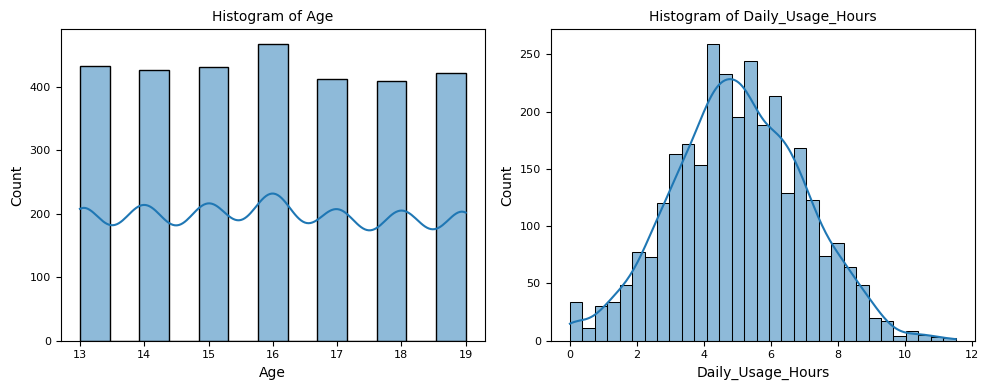

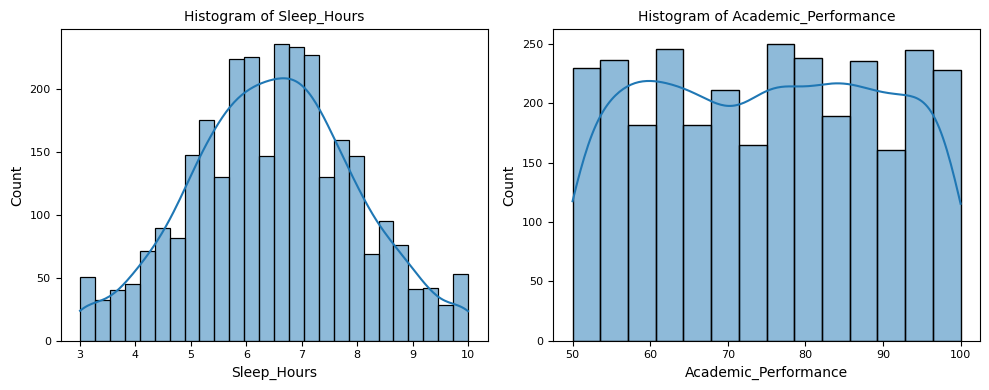

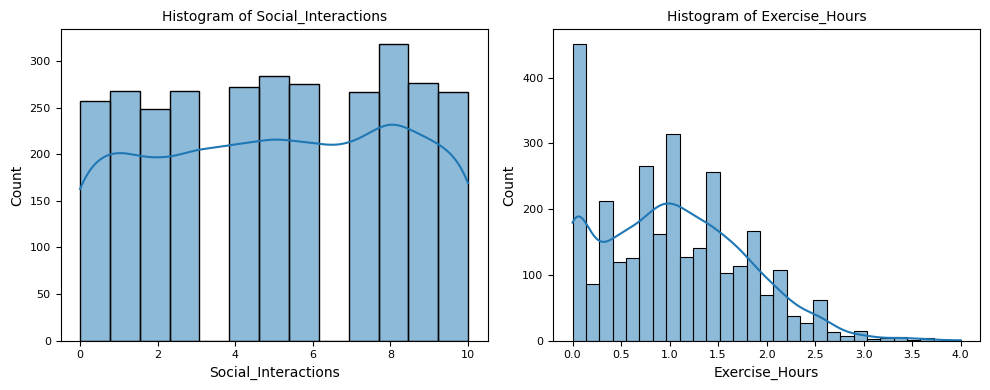

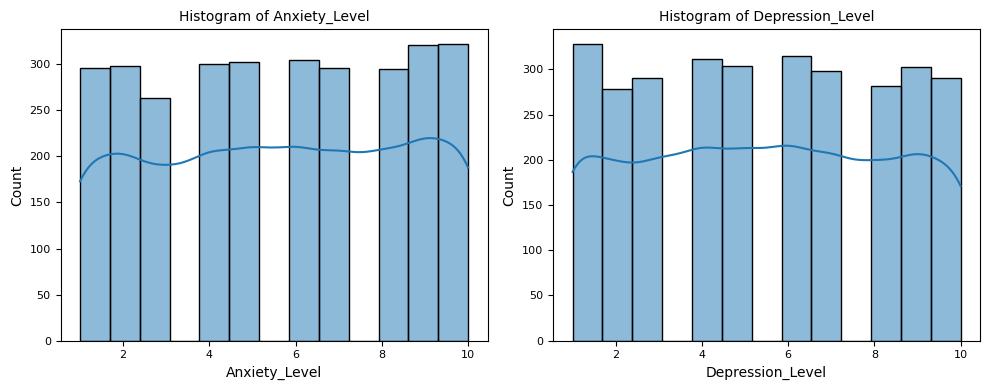

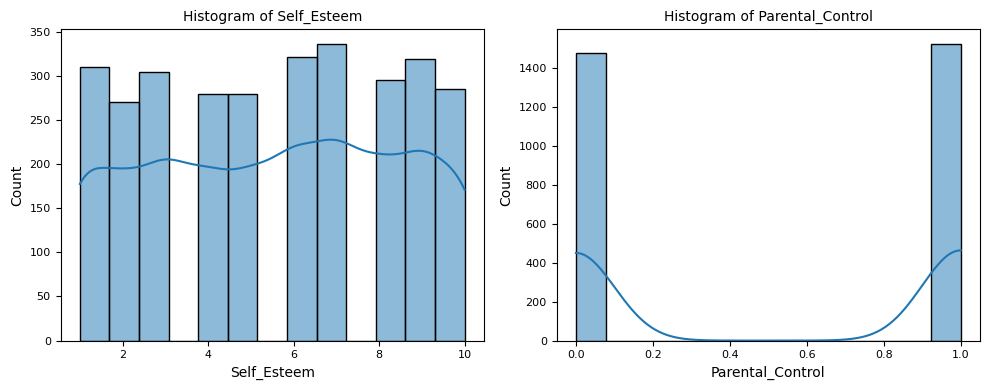

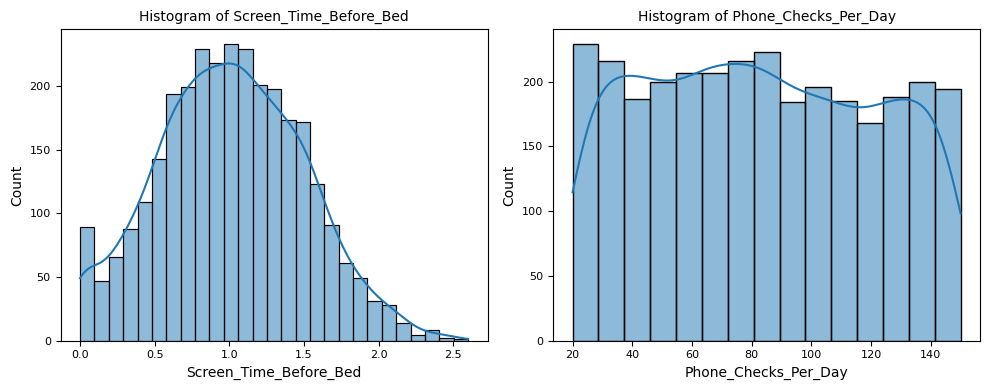

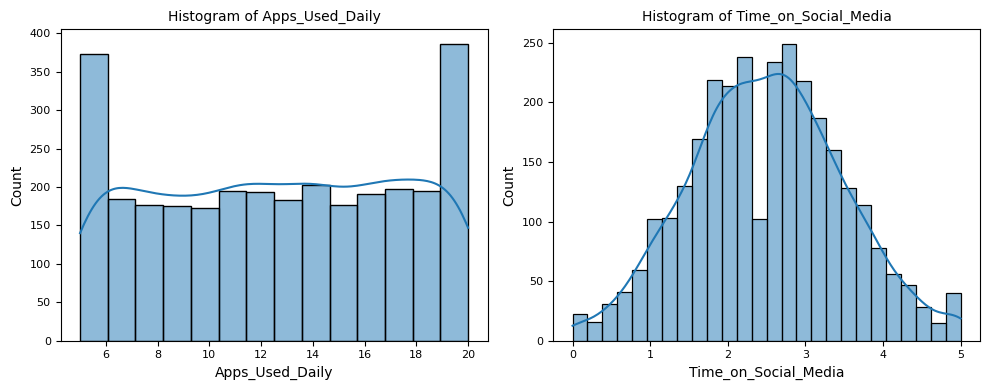

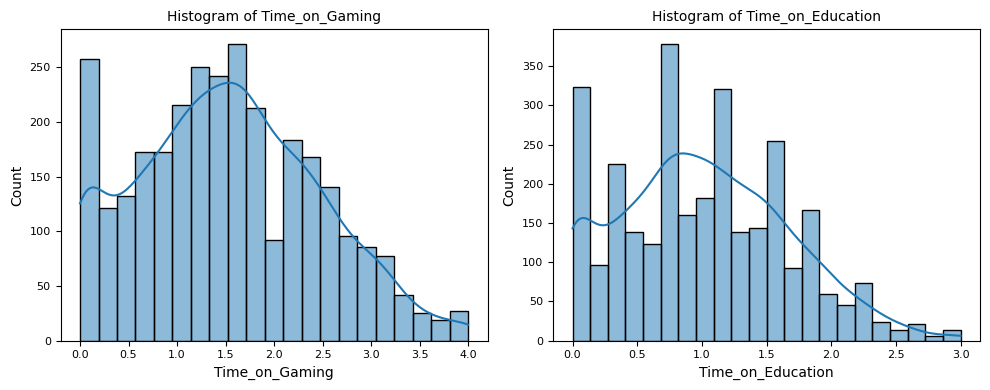

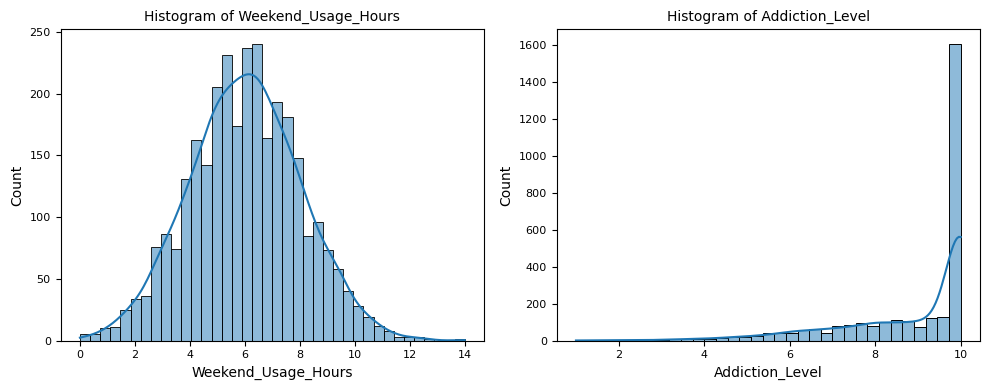

In [38]:
import seaborn as sns

numerical_cols = ['Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
                  'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 
                  'Depression_Level', 'Self_Esteem', 'Parental_Control',
                  'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
                  'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 
                  'Weekend_Usage_Hours', 'Addiction_Level']

# Plot in pairs
for i in range(0, len(numerical_cols), 2):
    cols_pair = numerical_cols[i:i+2]
    fig, axes = plt.subplots(1, len(cols_pair), figsize=(10, 4))
    
    if len(cols_pair) == 1:  # If last batch has only 1 column
        axes = [axes]
    
    for ax, col in zip(axes, cols_pair):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(f'Histogram of {col}', fontsize=10)
        ax.tick_params(axis='both', labelsize=8)
    
    plt.tight_layout()
    plt.show()

- Imports Seaborn, a library for beautiful statistical visualizations.

- numerical_cols = [...], List of numerical columns in the dataset to visualize.

- Looping in pairs (for i in range(0, len(numerical_cols), 2):), Takes two columns at a time for plotting side by side.

- fig, axes = plt.subplots(1, len(cols_pair), figsize=(10, 4)), Creates one row of plots (1) with len(cols_pair) columns (either 1 or 2).

- sns.histplot(..., kde=True) → Histogram + smooth density curve, Sets title and adjusts tick sizes.

- plt.tight_layout(); plt.show(), Ensures proper spacing and displays the figure.

- Shows distribution of each numerical feature,

- Helps detect skewness, outliers, and patterns in data.

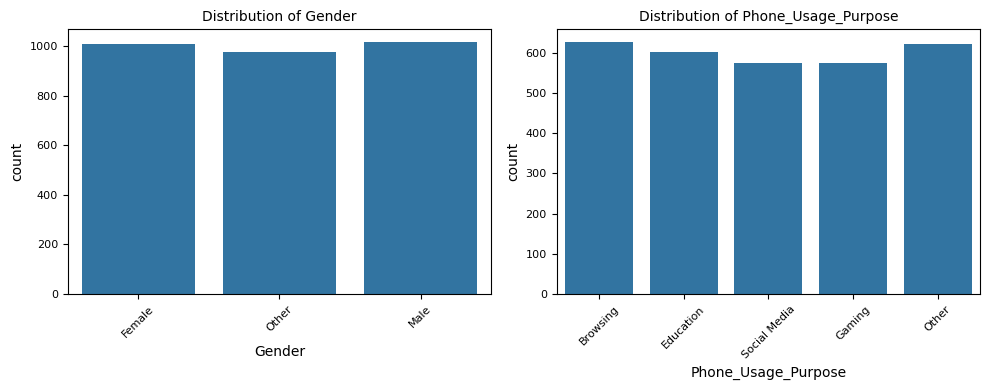

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Gender', 'Phone_Usage_Purpose']

# Plot in pairs
for i in range(0, len(categorical_cols), 2):
    cols_pair = categorical_cols[i:i+2]
    fig, axes = plt.subplots(1, len(cols_pair), figsize=(10, 4))
    
    if len(cols_pair) == 1:  # Handle last single column
        axes = [axes]
    
    for ax, col in zip(axes, cols_pair):
        sns.countplot(x=col, data=df, ax=ax)
        ax.set_title(f'Distribution of {col}', fontsize=10)
        ax.tick_params(axis='x', rotation=45, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
    
    plt.tight_layout()
    plt.show()

What it does:

- Plots bars showing the count of each category in the column.

- Loops through columns in pairs and formats titles and labels.

Insight:

- Reveals which categories are most common.

- Helps detect imbalances or unusual values.

- Example: If Phone_Usage_Purpose shows most teens use phones for social media, it indicates dominant usage behavior.

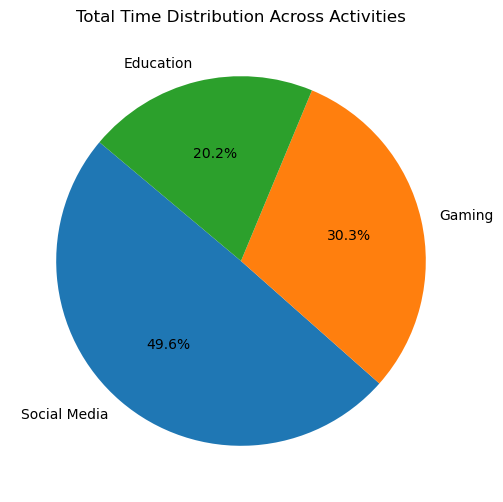

In [42]:
import matplotlib.pyplot as plt

# Sum total hours for each activity
total_social = df['Time_on_Social_Media'].sum()
total_gaming = df['Time_on_Gaming'].sum()
total_education = df['Time_on_Education'].sum()

# Create dictionary for plotting
time_spent = {
    "Social Media": total_social,
    "Gaming": total_gaming,
    "Education": total_education
}

# Plot pie chart
labels = list(time_spent.keys())
sizes = list(time_spent.values())

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Total Time Distribution Across Activities")
plt.show()

Code Explanation:

- total_social = df['Time_on_Social_Media'].sum()

    - Adds up all the hours in the Time_on_Social_Media column to get total hours spent on social media.

- total_gaming and total_education do the same for gaming and education.
  
- time_spent dictionary stores these totals with labels.

- plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

    - Creates the pie chart.
    
    - labels shows activity names.
    
    - autopct='%1.1f%%' displays percentage on each slice.
    
    - startangle=140 rotates the start of the pie for better view.

- plt.title(...) adds a title.

- plt.show() displays the chart.

Output Explanation:

- The pie chart visually shows how total time is distributed among social media, gaming, and education.

- Each slice size is proportional to the total hours of that activity.

- Percentages indicate the share of each activity relative to the total time.

# Ordinal Encoding

In [45]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize encoder with specific order
encoder = OrdinalEncoder(categories=[['7th', '8th', '9th', '10th', '11th', '12th']])

# Fit and transform the column
df['School_Grade_Num'] = encoder.fit_transform(df[['School_Grade']])
# Drop the original column if needed
df_ord = df.drop('School_Grade', axis=1)
df_ord

,Age,Gender,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,...,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level,School_Grade_Num
0,13,Female,4.0,6.1,78,5,0.1,10,3,8,...,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0,2.0
1,17,Female,5.5,6.5,70,5,0.0,3,7,3,...,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0,0.0
2,13,Other,5.8,5.5,93,8,0.8,2,3,10,...,137,8,0.3,1.5,0.4,Education,6,5.7,9.2,4.0
3,18,Female,3.1,3.9,78,8,1.6,9,10,3,...,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8,5.0
4,14,Other,2.5,6.7,56,4,1.1,1,5,1,...,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,16,Female,3.9,6.4,53,4,0.9,7,10,2,...,80,15,2.7,1.8,1.0,Other,8,9.4,9.8,5.0
2996,13,Female,3.6,7.3,93,5,0.0,8,8,9,...,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5,1.0
2997,14,Other,3.2,6.5,98,1,0.0,4,3,9,...,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2,0.0
2998,17,Female,6.7,7.5,67,3,0.2,3,5,9,...,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0,2.0


This code encodes the ordinal column School_Grade into numeric values so it can be used in machine learning models:

- OrdinalEncoder is initialized with the logical order of grades: '7th' < '8th' < ... < '12th'.

- fit_transform converts the text grades into numbers: '7th' → 0, '8th' → 1, ..., '12th' → 5.

- The original School_Grade column is dropped, keeping only the numeric version (School_Grade_Num).

Insight:

- Preserves the natural order of grades, which is important for models that can leverage ordinal relationships.

- For example, 12th grade is numerically higher than 7th grade, reflecting its true rank.

- Unlike one-hot encoding, this approach is efficient and maintains meaningful ordering.

# One hot Encoding

In [48]:
from sklearn.preprocessing import OneHotEncoder

cat_column = ['Gender', 'Phone_Usage_Purpose']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False) # sparse_output=False for dense array

# Fit and transform the categorical column
one_hot_encoded = encoder.fit_transform(df_ord[cat_column])
# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_column))
# Concatenate with the original DataFrame (excluding the original categorical column)
df_final = pd.concat([df_ord.drop(cat_column, axis=1), encoded_df], axis=1)

df_final

,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,...,Addiction_Level,School_Grade_Num,Gender_Female,Gender_Male,Gender_Other,Phone_Usage_Purpose_Browsing,Phone_Usage_Purpose_Education,Phone_Usage_Purpose_Gaming,Phone_Usage_Purpose_Other,Phone_Usage_Purpose_Social Media
0,13,4.0,6.1,78,5,0.1,10,3,8,0,...,10.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,17,5.5,6.5,70,5,0.0,3,7,3,0,...,10.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,13,5.8,5.5,93,8,0.8,2,3,10,0,...,9.2,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,18,3.1,3.9,78,8,1.6,9,10,3,0,...,9.8,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14,2.5,6.7,56,4,1.1,1,5,1,0,...,8.6,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,16,3.9,6.4,53,4,0.9,7,10,2,1,...,9.8,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2996,13,3.6,7.3,93,5,0.0,8,8,9,1,...,5.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2997,14,3.2,6.5,98,1,0.0,4,3,9,0,...,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2998,17,6.7,7.5,67,3,0.2,3,5,9,0,...,10.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


This code one-hot encodes categorical columns (Gender, Phone_Usage_Purpose):

- Converts each category into separate binary columns (0 or 1) using OneHotEncoder.

- Drops the original categorical columns and adds the new encoded columns to the DataFrame.

Insight:

- Avoids implying any order among categories.

- Makes the data suitable for ML models that require numerical input.

- Example: Gender becomes Gender_Male and Gender_Female, showing presence/absence.

In [50]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               3000 non-null   int64  
 1   Daily_Usage_Hours                 3000 non-null   float64
 2   Sleep_Hours                       3000 non-null   float64
 3   Academic_Performance              3000 non-null   int64  
 4   Social_Interactions               3000 non-null   int64  
 5   Exercise_Hours                    3000 non-null   float64
 6   Anxiety_Level                     3000 non-null   int64  
 7   Depression_Level                  3000 non-null   int64  
 8   Self_Esteem                       3000 non-null   int64  
 9   Parental_Control                  3000 non-null   int64  
 10  Screen_Time_Before_Bed            3000 non-null   float64
 11  Phone_Checks_Per_Day              3000 non-null   int64  
 12  Apps_U

Insight:

- Confirms that all categorical columns are encoded and no missing values remain (if handled).

- Helps verify that the DataFrame is ready for modeling.

# Box-plot diagram

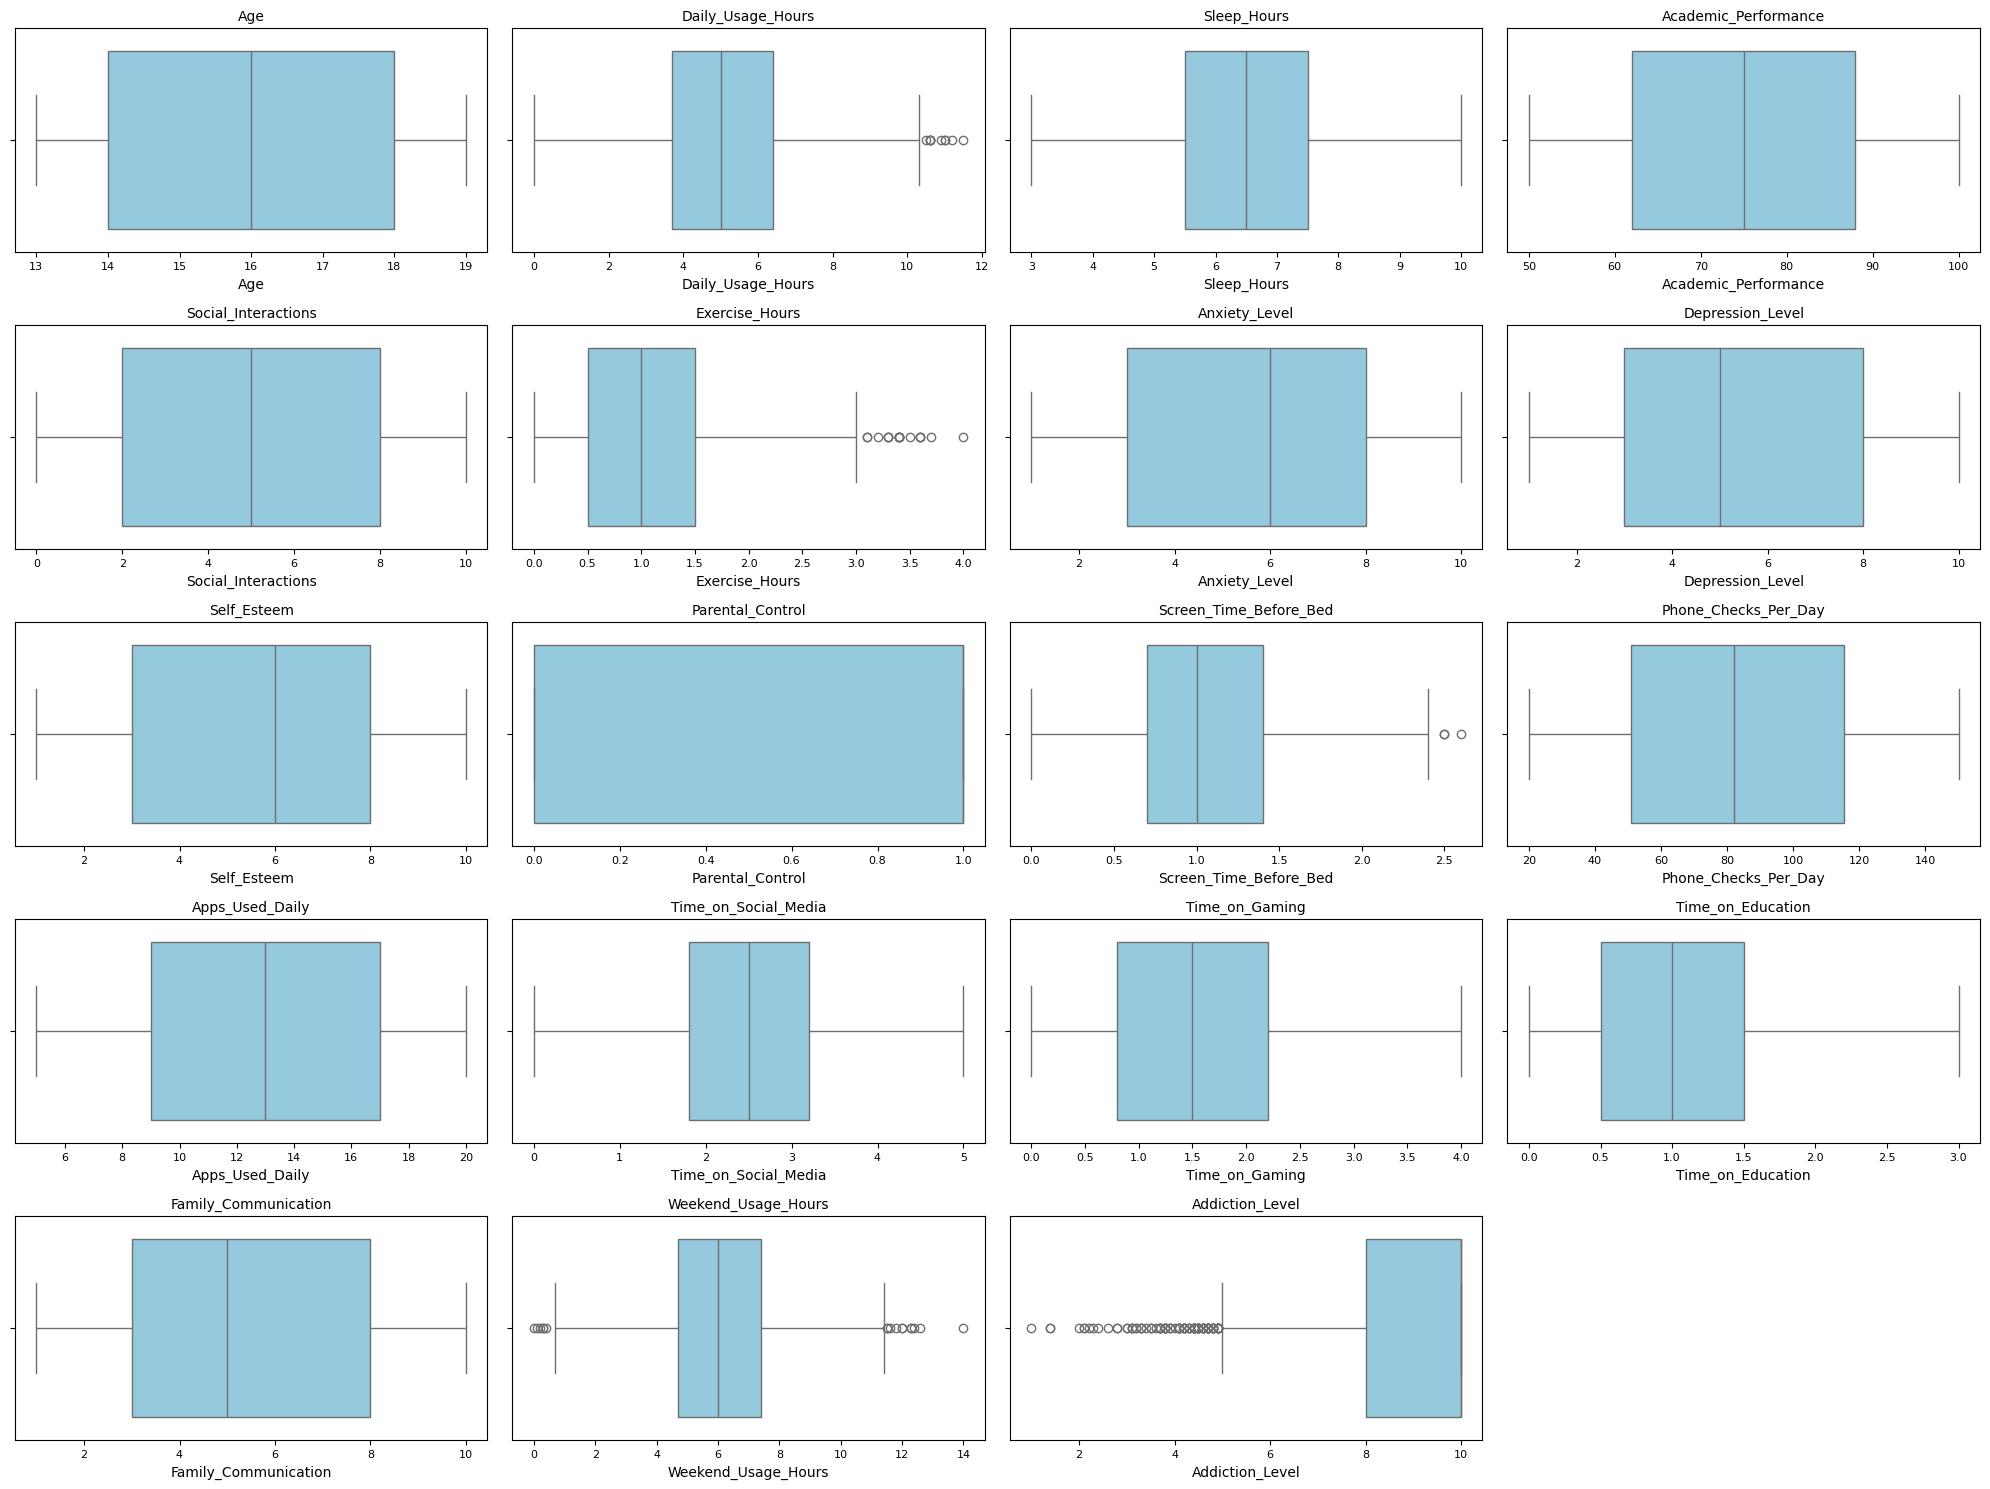

In [53]:
# Boxplots
numeric_columns = [
    'Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 
    'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level',
    'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 
    'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 
    'Time_on_Gaming', 'Time_on_Education', 'Family_Communication', 
    'Weekend_Usage_Hours', 'Addiction_Level'
]

# Set up the subplot grid (5 rows x 4 columns)
fig, axes = plt.subplots(5, 4, figsize=(20, 15))
axes = axes.flatten()  # Flatten to easily iterate

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(labelsize=8)

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

This code plots boxplots for all numerical columns:

- Each boxplot shows the median, quartiles, and outliers for a column.

- Subplots are arranged in a 5×4 grid for easy visualization.

Insight:

- Detects outliers and extreme values.

- Shows spread and skewness of each feature.

- Helps identify columns that may need scaling or transformation before modeling.

In [55]:
# "Binning” or “Discretization"
bins = [0, 3, 7, 10]
labels = ['Low', 'Medium', 'High']
df_final['target'] = pd.cut(df_final['Addiction_Level'],
                            bins=bins,
                            labels=labels,
                            include_lowest=True)

df_final['target'] = df_final['target'].astype('category')

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=[labels])  # preserve order
df_final['target_encoded'] = encoder.fit_transform(df_final[['target']])

# Now target_encoded is numeric and ordered
print(df_final[['Addiction_Level', 'target', 'target_encoded']])

      Addiction_Level  target  target_encoded
0                10.0    High             2.0
1                10.0    High             2.0
2                 9.2    High             2.0
3                 9.8    High             2.0
4                 8.6    High             2.0
...               ...     ...             ...
2995              9.8    High             2.0
2996              5.5  Medium             1.0
2997              6.2  Medium             1.0
2998             10.0    High             2.0
2999              6.3  Medium             1.0

[3000 rows x 3 columns]


This code bins the numeric Addiction_Level into categories (Low, Medium, High) and then ordinally encodes them:

- pd.cut() → Creates the categorical target column.

- OrdinalEncoder → Converts Low→0, Medium→1, High→2.

Insight:

- Converts continuous scores into ordered categories for classification.

- Preserves natural order so models can interpret Low < Medium < High.

In [57]:
# Drop ID, Name, and target
X = df_final.drop(['Addiction_Level', 'target', 'target_encoded'], axis=1)

# Target variable
y = df_final['target_encoded']

This code prepares the features (X) and target (y) for modeling:

- X → All columns except Addiction_Level, target, and target_encoded (these are the original and processed target columns).

- y → The encoded target variable (0=Low, 1=Medium, 2=High).

Insight:

- Separates inputs (features) from output (target), which is required before training a machine learning model.

# Training-testing model

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code splits the dataset into training and testing sets:

- train_test_split() divides X (features) and y (target) into:

    - X_train, y_train → used to train the model

    - X_test, y_test → used to evaluate the model

- test_size=0.2 → 20% of data is for testing, 80% for training.

- random_state=42 → Ensures the split is reproducible.

Insight:

- Separating train and test sets prevents data leakage.

- Allows evaluation of how well the model generalizes to unseen data.

In [65]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train.value_counts())

After SMOTE: target_encoded
2.0    2043
1.0    2043
0.0    2043
Name: count, dtype: int64


This code applies SMOTE (Synthetic Minority Over-sampling Technique) to balance class distribution in the training set:
- SMOTE generates synthetic samples for minority classes.
    - Apply SMOTE on training data
- Balances all classes in y_train by creating synthetic samples for minority classes.

Insight:

- Helps prevent model bias toward majority classes.

- Ensures all classes are equally represented during training, improving performance on minority classes.

In [70]:
from sklearn.ensemble import RandomForestClassifier
# ---- Train model ----
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

This code trains a Random Forest classifier on your training data:

- RandomForestClassifier(random_state=42) → Initializes the model with a fixed random seed for reproducibility.

- model.fit(X_train, y_train) → Learns patterns from the features (X_train) and target (y_train).

Insight:

- The model is now ready to make predictions on unseen data.

- Random Forest handles non-linear relationships and is robust to overfitting for many features.

In [72]:
y_pred = model.predict(X_test)

This code makes predictions on the test set using the trained model:
- model.predict(X_test) → Uses the Random Forest model to predict the target class for each sample in X_test.

- y_pred → Stores the predicted labels.

Insight:

- These predictions can now be compared with the true labels (y_test) to evaluate model performance.

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9283333333333333

This code calculates the accuracy of your model on the test set:
- Compares the true labels (y_test) with the predicted labels (y_pred).

- Returns a value between 0 and 1 representing the proportion of correct predictions.

Insight:

- Provides a quick measure of overall model performance.

- Higher accuracy → Model predictions closely match the true target values.

In [80]:
from sklearn.metrics import classification_report

print('Classification Report: \n',classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.84      0.62      0.72        87
         2.0       0.94      0.98      0.96       511

    accuracy                           0.93       600
   macro avg       0.59      0.54      0.56       600
weighted avg       0.92      0.93      0.92       600



This code evaluates the Random Forest model:

- classification_report → Shows precision, recall, F1-score for each class.

- Provides detailed metrics for each class:
  
- Precision → Correct positive predictions / Total predicted positives

- Recall → Correct sample predictions / Total actual positives(sample)

- F1-score → Harmonic mean of precision and recall

- Support → Number of samples per class

Insight:

- The classification report shows how well the model predicts each class, useful for imbalanced datasets.

- Measures overall performance and per-class effectiveness, especially useful for imbalanced targets.

💡 Example:
High precision and recall for High addiction class means the model is good at identifying highly addicted teens.

In [83]:
from sklearn.metrics import balanced_accuracy_score

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))

Balanced Accuracy: 0.5350113592910003


Balanced Accuracy: 
- Computes the average recall per class.

- Useful for imbalanced datasets where standard accuracy can be misleading.

Insight:

- Balanced accuracy ensures fair evaluation across all classes.

💡 Example:
If many High cases are predicted as Medium, the model struggles with high addiction levels.

[[  0   2   0]
 [  1  54  32]
 [  0   8 503]]


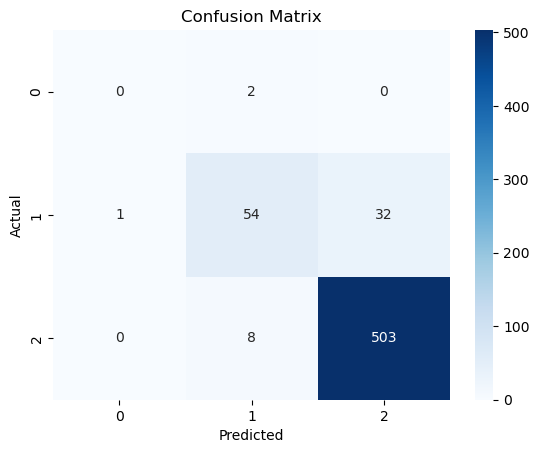

In [85]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

This code computes and prints the confusion matrix for your model:
- confusion_matrix compares the true labels (y_test) with predicted labels (y_pred).

- Returns a matrix showing correct and incorrect predictions for each class.

- - Each cell shows the number of samples for that actual-predicted combination.

Insight:

- Diagonal values → Correct predictions.

- Off-diagonal values → Misclassifications.

- Helps identify which classes the model confuses the most.

           Predicted
           Low Medium High
True Low      0    2   0
True Medium   0    54   32
True High     0    8   503

Low class: 0 correct, 2 predicted as Medium.

Medium class: 54 correct, 32 predicted as High.

High class: 503 correct, 8 predicted as Medium.

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               3000 non-null   int64  
 1   Daily_Usage_Hours                 3000 non-null   float64
 2   Sleep_Hours                       3000 non-null   float64
 3   Academic_Performance              3000 non-null   int64  
 4   Social_Interactions               3000 non-null   int64  
 5   Exercise_Hours                    3000 non-null   float64
 6   Anxiety_Level                     3000 non-null   int64  
 7   Depression_Level                  3000 non-null   int64  
 8   Self_Esteem                       3000 non-null   int64  
 9   Parental_Control                  3000 non-null   int64  
 10  Screen_Time_Before_Bed            3000 non-null   float64
 11  Phone_Checks_Per_Day              3000 non-null   int64  
 12  Apps_U

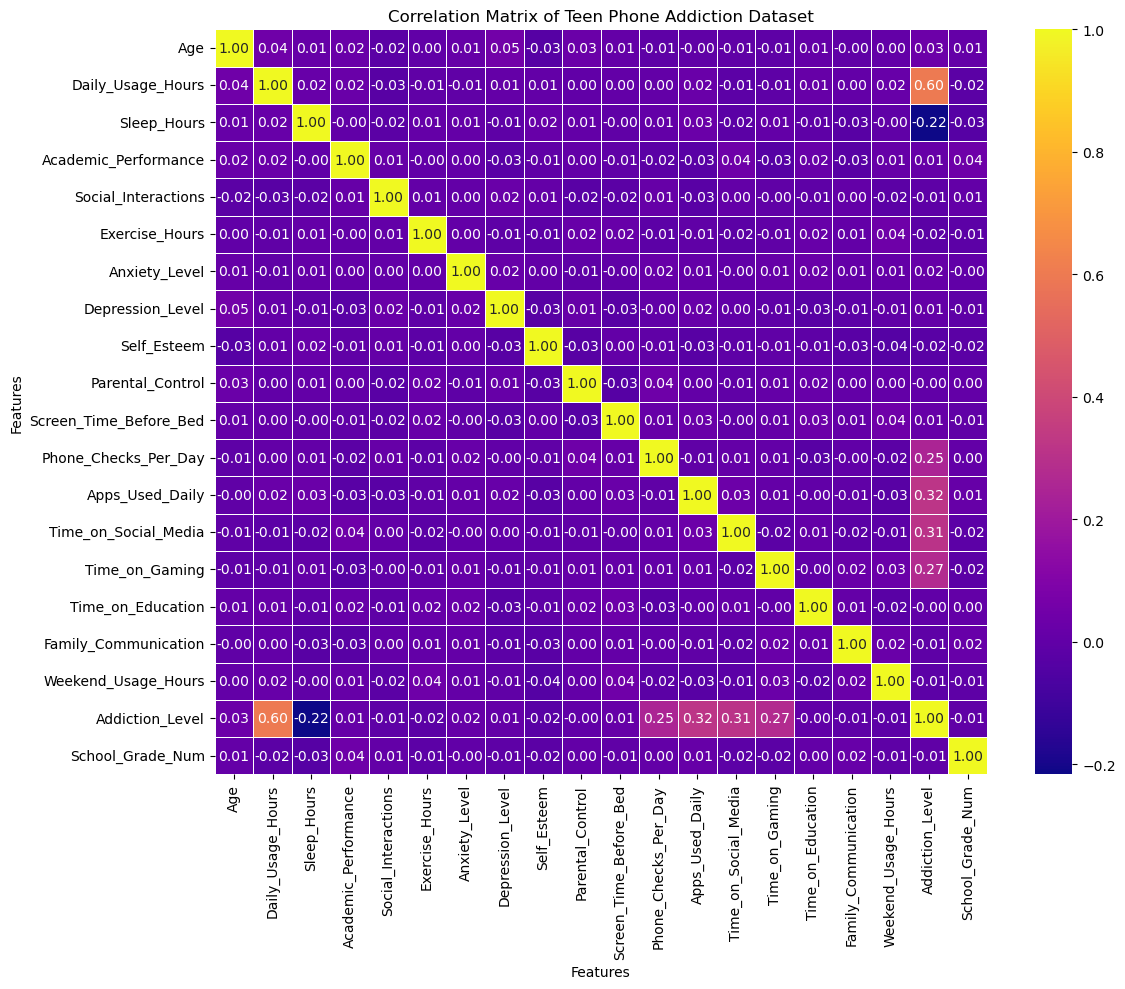

In [93]:
# Compute correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True) # 📊 Compute numeric correlations (-1 to 1)

# Plot the heatmap
plt.figure(figsize=(12, 10))# 🖼️ Set figure size
sns.heatmap(correlation_matrix, #  Heatmap with values
            annot=True,
            fmt=".2f", 
            cmap="plasma", 
            linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Insights from Heatmap

🔺 High positive correlation: Daily_Usage_Hours ↔ Addiction_Level → more usage = more addiction

🔻 Negative correlation: Sleep_Hours ↔ Daily_Usage_Hours → more phone = less sleep

⚖️ Weak correlation: Some features like Age may not affect addiction much

🎓 Academic impact: Daily_Usage_Hours ↔ Academic_Performance (if negative) → heavy phone use may lower performance

💡 Use strong correlations to select important features for modeling

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               3000 non-null   int64  
 1   Daily_Usage_Hours                 3000 non-null   float64
 2   Sleep_Hours                       3000 non-null   float64
 3   Academic_Performance              3000 non-null   int64  
 4   Social_Interactions               3000 non-null   int64  
 5   Exercise_Hours                    3000 non-null   float64
 6   Anxiety_Level                     3000 non-null   int64  
 7   Depression_Level                  3000 non-null   int64  
 8   Self_Esteem                       3000 non-null   int64  
 9   Parental_Control                  3000 non-null   int64  
 10  Screen_Time_Before_Bed            3000 non-null   float64
 11  Phone_Checks_Per_Day              3000 non-null   int64  
 12  Apps_U

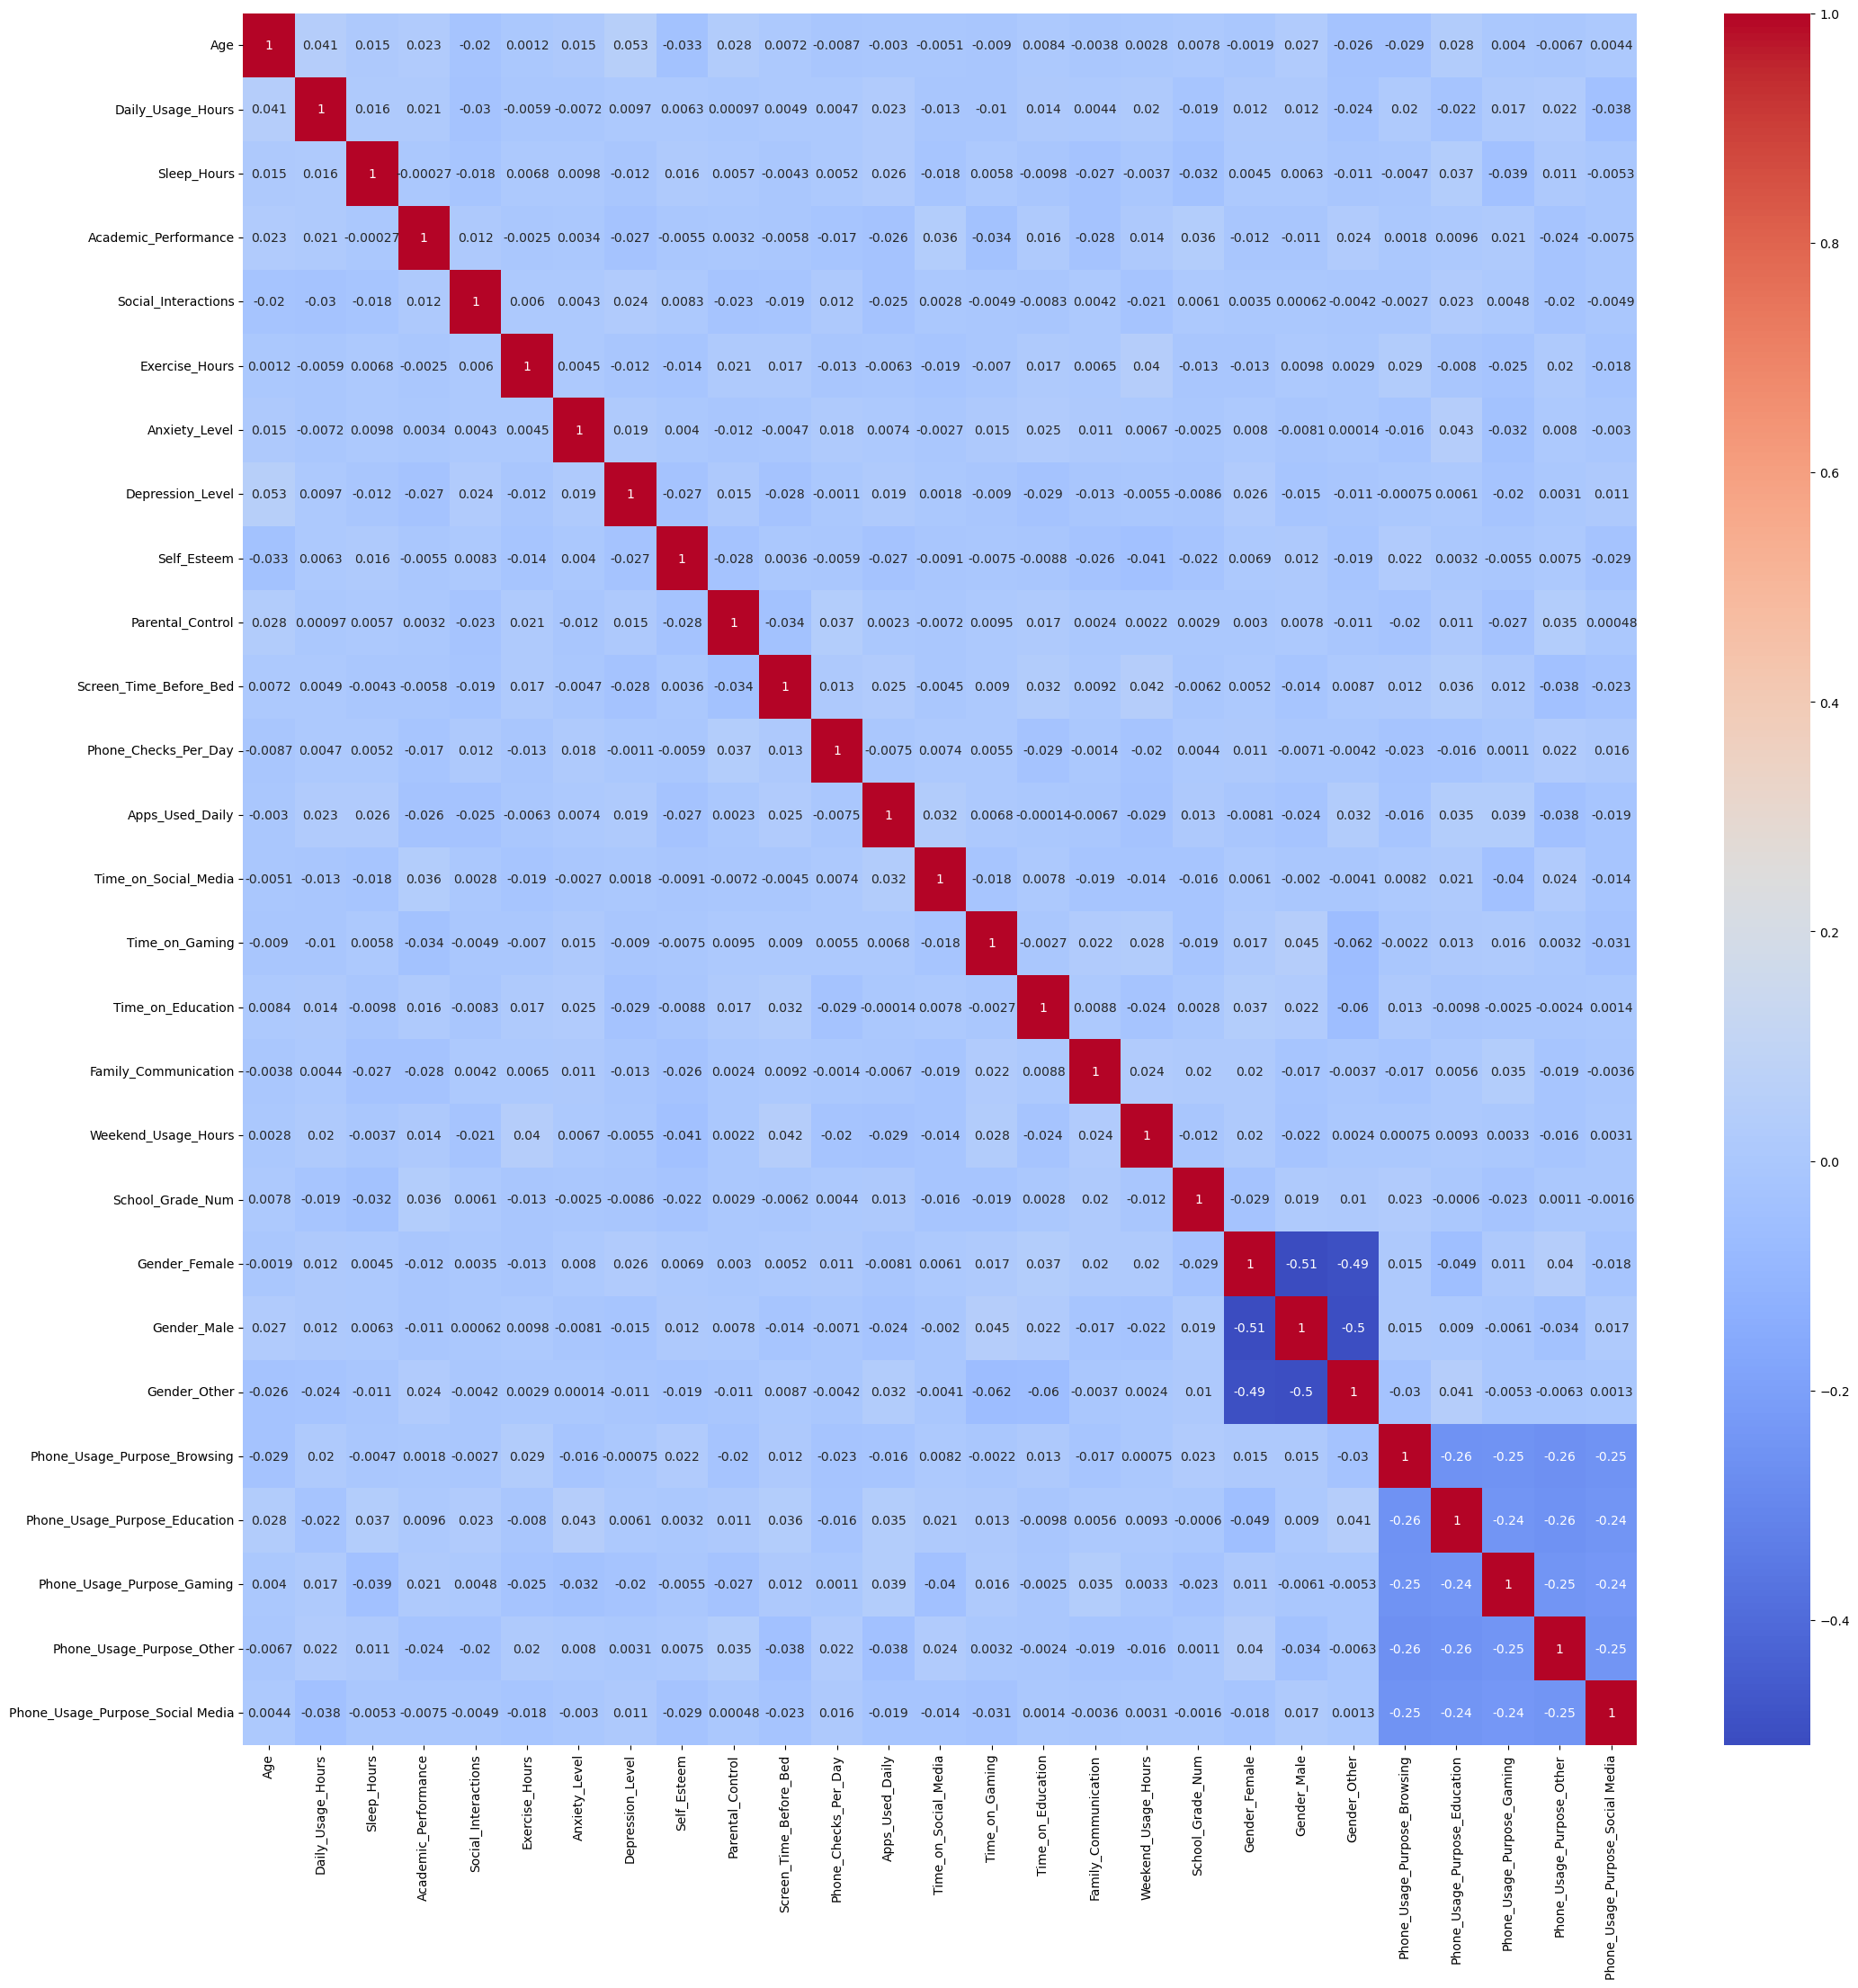

In [100]:
corr_matrix = X.corr()
corr_matrix

plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [101]:
# X = all features, y = target
X = df_final.drop(columns=['target', 'target_encoded', 'Addiction_Level']) # 🚫 Drop target columns
y = df_final['target_encoded']  # 🎯 Target variable

# Compute absolute correlation matrix
corr_matrix = X.corr().abs()

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop them (if any)
X_filtered = X.drop(columns=to_drop) if to_drop else X.copy()

print("Dropped due to high correlation:", to_drop)
print("Remaining columns:", X_filtered.shape[1])

Dropped due to high correlation: []
Remaining columns: 27


What the code does

- Split data: X = features, y = target 🎯

- Compute correlations: corr_matrix = X.corr().abs() 📊

- Check only upper triangle to avoid duplicates 🔺

- Find highly correlated features (>0.85) ⚠️

- Drop them to reduce redundancy ✂️

- Print summary: shows dropped and remaining columns 📝

⚡ Why: Removes redundant features that are highly correlated, preventing multicollinearity.

✅ Effect: Simplifies the model, reduces overfitting, and improves interpretability.

📌 Output:

- Dropped due to high correlation → list of features removed

- Remaining columns → features left for modeling

Removing highly correlated features helps:

- Reduce multicollinearity

- Simplify the model

- Improve stability and interpretability

In [105]:
# Embedded method (feature importance)
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_filtered, y)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_filtered.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df.head(10))

# Select features with importance > 0.01
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist()

# Create final X for training
X_final = X_filtered[selected_features]

print("Selected Features for X_train:", selected_features)
print("Shape of X_final:", X_final.shape)

                 Feature  Importance
1      Daily_Usage_Hours    0.307491
12       Apps_Used_Daily    0.100357
11  Phone_Checks_Per_Day    0.094044
14        Time_on_Gaming    0.079841
13  Time_on_Social_Media    0.074166
2            Sleep_Hours    0.069961
17   Weekend_Usage_Hours    0.029412
3   Academic_Performance    0.026685
5         Exercise_Hours    0.024738
15     Time_on_Education    0.022249
Selected Features for X_train: ['Daily_Usage_Hours', 'Apps_Used_Daily', 'Phone_Checks_Per_Day', 'Time_on_Gaming', 'Time_on_Social_Media', 'Sleep_Hours', 'Weekend_Usage_Hours', 'Academic_Performance', 'Exercise_Hours', 'Time_on_Education', 'Depression_Level', 'Screen_Time_Before_Bed', 'Age', 'Self_Esteem', 'Family_Communication', 'Social_Interactions', 'Anxiety_Level', 'School_Grade_Num']
Shape of X_final: (3000, 18)


What the code does

- Train Random Forest on filtered features 🎯

- Get feature importances from the model 📊

- Sort and print top 10 features 🔝

- Keep features with importance > 0.01 ✂️

- Create X_final with selected important features ✅

Insight

- This embedded method uses the Random Forest model itself to measure feature importance, so the selection is based on how much each feature contributes to predicting the target.

- By keeping only features with importance > 0.01, we remove weak or irrelevant features, reducing noise in the dataset.

- This helps improve model accuracy, training speed, and stability, while making the model easier to interpret.

- It’s an automatic, data-driven way to select features rather than relying solely on manual selection.

In [107]:
# X_final = selected features
# y = target
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

- Splits the dataset into training and testing sets.

- X_final = selected important features, y = target.

- test_size=0.2 → 20% of data for testing, 80% for training.

- random_state=42 → ensures reproducibility of the split.

- stratify=y → keeps the same class distribution in train and test sets.

- Use stratified train/test split to ensure all classes appear in test set properly.

Insight

- Prepares the data for model training and evaluation.

- Ensures balanced representation of classes in both sets, which is crucial for imbalanced datasets.

- Helps assess model performance on unseen data reliably.

In [111]:
print(y_train.value_counts()) # Count of each class in training set
print(y_test.value_counts())

target_encoded
2.0    2043
1.0     346
0.0      11
Name: count, dtype: int64
target_encoded
2.0    511
1.0     86
0.0      3
Name: count, dtype: int64


Insight

🔹 Shows how many samples belong to each class in train and test sets.

⚖️ Ensures stratification worked → class distribution is similar in both sets.

✅ Important for imbalanced datasets, so the model sees all classes fairly.

In [114]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: target_encoded
2.0    2043
1.0     346
0.0      11
Name: count, dtype: int64
After SMOTE: target_encoded
2.0    2043
1.0    2043
0.0    2043
Name: count, dtype: int64


- Uses SMOTE to create synthetic samples for minority classes in X_train and y_train.

- Balances the training data without touching the test set.

- Applies SMOTE on the training set:

    - fit_resample() generates new synthetic samples for the minority class(es).
    
    - Returns:
    
        - X_train_res → new training features including synthetic samples
        
        - y_train_res → new training labels with balanced classes

🔹 Note: Only apply SMOTE on the training set, not on the test set. The test set must remain real data for proper evaluation.

💡 Insight

- SMOTE solves class imbalance, which is common in classification problems.

- By creating synthetic samples, it allows the model to learn all classes equally.

- Helps improve model performance, especially for minority classes, and prevents bias toward the majority class.

# Random Forest Classifier

In [120]:
# Train model
model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=300,
    max_depth=10,        # limit tree depth
    min_samples_split=5, # require more samples to split
    min_samples_leaf=4,  # require more samples per leaf
    random_state=42
)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=300, random_state=42)

- Random Forest classifier is initialized:

    - random_state=42 → ensures reproducible results 🔄
    
    - class_weight='balanced' → helps handle class imbalance ⚖️

- .fit(X_train_res, y_train_res) → trains the model on the SMOTE-balanced training data.

Insight

✅ Model learns from all classes equally due to SMOTE and balanced weights.

✅ Random Forest handles non-linear relationships well.

✅ Ready for evaluation on the test set.

In [122]:
train_pred = model.predict(X_train_res)

print("Training Accuracy:", accuracy_score(y_train_res, train_pred))
print("Classification Report: \n", classification_report(y_train_res, train_pred, zero_division=0))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_train_res, train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train_res, train_pred))

Training Accuracy: 0.9970631424375918
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2043
         1.0       0.99      1.00      1.00      2043
         2.0       1.00      0.99      1.00      2043

    accuracy                           1.00      6129
   macro avg       1.00      1.00      1.00      6129
weighted avg       1.00      1.00      1.00      6129

Balanced Accuracy Score: 0.9970631424375918
Confusion Matrix:
 [[2041    2    0]
 [   4 2038    1]
 [   0   11 2032]]


In [123]:
# Optional: evaluate
test_pred = model.predict(X_test)

print("Testing Accuracy:", accuracy_score(y_test, test_pred))
print('Classification Report: \n',classification_report(y_test, test_pred, zero_division=0))
print('Balanced Accuracy Score:', balanced_accuracy_score(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))

Testing Accuracy: 0.935
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.33      0.50         3
         1.0       0.73      0.87      0.79        86
         2.0       0.98      0.95      0.96       511

    accuracy                           0.94       600
   macro avg       0.90      0.72      0.75       600
weighted avg       0.94      0.94      0.94       600

Balanced Accuracy Score: 0.7181819101220185
Confusion Matrix:
 [[  1   2   0]
 [  0  75  11]
 [  0  26 485]]


- Uses the trained Random Forest to predict labels for the test set. 👀
  
- Prints overall accuracy → fraction of correct predictions ✅

- Shows precision, recall, F1-score, and support for each class 📝
 
- zero_division=0 avoids errors if a class is missing in predictions

- Balanced accuracy accounts for class imbalance ⚖️

- Average of recall across all classes → gives a fair performance measure
Insight

🔹 Evaluates how well the model performs on unseen data

🔹 Metrics like F1-score and balanced accuracy are crucial for imbalanced datasets

🔹 Helps identify strengths and weaknesses of the model per class

In [125]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

rf = RandomForestClassifier(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # only 50 random combinations
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # use all cores
    verbose=2,
    random_state=42
)

print("Starting RandomizedSearchCV fit...")
random_search.fit(X_train_res, y_train_res)
print("RandomizedSearchCV fit completed!")

# Print best parameters and score
print("Best Parameters Found:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

Starting RandomizedSearchCV fit...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV fit completed!
Best Parameters Found: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': False}
Best Accuracy Score: 0.9884162865798848


Code explanation:

- Random Forest setup: rf = RandomForestClassifier(random_state=42) initializes a random forest classifier.

- Parameter grid: param_grid defines ranges of hyperparameters to test, like number of trees, max depth, split criteria, and sampling options.

- Cross-validation strategy: StratifiedKFold ensures each fold preserves the original class distribution.

RandomizedSearchCV:

- Tests 50 random combinations of hyperparameters (n_iter=50).

- Uses 5-fold stratified CV (cv=5).

- Evaluates performance using accuracy.

- Runs in parallel (n_jobs=-1) and shows progress (verbose=2).

Fit model: random_search.fit() trains multiple random forest models with different hyperparameters on your resampled training data (X_train_res, y_train_res).

Output:

- random_search.best_params_ → Best hyperparameters found.

- random_search.best_score_ → Mean accuracy across CV folds for the best hyperparameters.

Test Log Loss: 0.21469623252244668
Test Accuracy: 0.925
              precision    recall  f1-score   support

         0.0       1.00      0.33      0.50         3
         1.0       0.73      0.87      0.79        86
         2.0       0.98      0.95      0.96       511

    accuracy                           0.94       600
   macro avg       0.90      0.72      0.75       600
weighted avg       0.94      0.94      0.94       600

Test Balanced Accuracy: 0.5490071147923967
[[  1   2   0]
 [  0  75  11]
 [  0  26 485]]


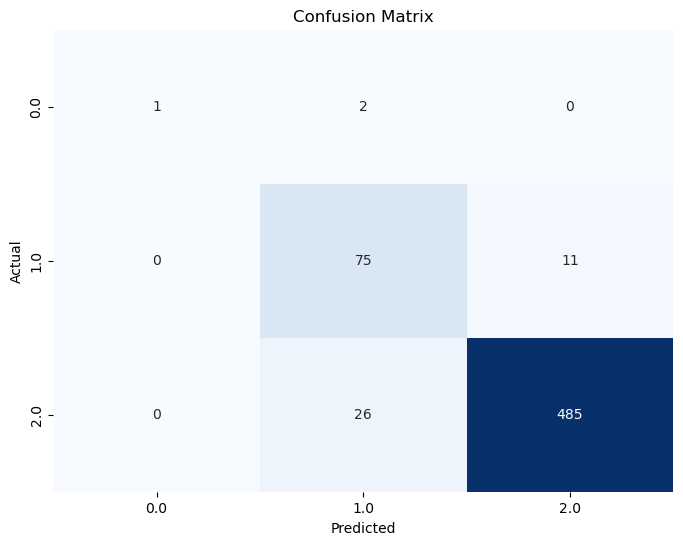

In [127]:
from sklearn.metrics import log_loss

best_rf = random_search.best_estimator_
best_rf.fit(X_train_res, y_train_res)

# Predict probabilities
y_pred_proba = best_rf.predict_proba(X_test)

# Calculate log loss
test_loss = log_loss(y_test, y_pred_proba)
print("Test Log Loss:", test_loss)

# Optional: Accuracy & report
y_pred = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, test_pred, zero_division=0))
print("Test Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, test_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- Uses the Random Forest with best hyperparameters from GridSearchCV.

- Train best model from GridSearchCV on X_train_res, y_train_res.

- Predict probabilities on X_test and calculate log loss to evaluate probability accuracy.

- predict_proba gives the probability of each class.

- Log loss measures how well these probabilities match actual labels (lower is better).

- Converts probabilities to final class predictions.

- Evaluates performance with accuracy, precision, recall, F1-score, and confusion matrix.

- Predict class labels and compute accuracy, classification report, and confusion matrix.

- Visualize confusion matrix with a heatmap to see misclassifications.

✅ Key Insights from this code

- Probability evaluation: Log loss gives a nuanced view of model performance beyond simple accuracy and evaluates probability predictions.

- Performance metrics: Accuracy, precision, recall, F1-score reveal strengths and weaknesses per class, especially important for imbalanced targets.

- Class confusion: The confusion matrix visually shows where the model misclassifies samples.

- Minority class warning: In this case, UndefinedMetricWarning occurs for very rare classes (like 0.0), highlighting the need for SMOTE or class weighting.

- Useful for imbalanced datasets.

# XG Boost

In [130]:
classes, counts = np.unique(y_train, return_counts= True)
print(dict(zip(classes, counts)))

{0.0: 11, 1.0: 346, 2.0: 2043}


It finds unique class labels in y_train and counts how many times each appears.

This means in your y_train dataset:

- Class 0.0 appears 11 times (very few samples)

- Class 1.0 appears 346 times

- Class 2.0 appears 2043 times

Your dataset is highly imbalanced, with class 2.0 dominating and 0.0 being rare, which can cause bias in the model.

In [132]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    max_depth=2,
    n_estimators=500,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    reg_alpha=3,
    reg_lambda=3,
    objective='multi:softmax',
    num_class=3,
    random_state=42
)

xgb_model.fit(
    X_train_res, y_train_res,
    verbose=True
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_class=3, ...)

- max_depth=2 → Shallow trees to reduce overfitting.

- n_estimators=500 → Builds up to 500 boosting trees.

- learning_rate=0.03 → Small learning rate for gradual learning.

- subsample=0.8 → Uses 80% of training samples per tree (adds randomness).

- colsample_bytree=0.8 → Uses 80% of features per tree.

- min_child_weight=5 → Minimum sum of instance weights (controls overfitting).

- reg_alpha=3 → L1 regularization (sparsity penalty).

- reg_lambda=3 → L2 regularization (ridge penalty).

- objective='multi:softmax' → Multi-class classification; outputs class labels directly.

- num_class=3 → There are 3 target classes.

- random_state=42 → Ensures reproducibility.

X_train_res, y_train_res → Your training features and labels (likely resampled to fix imbalance).

verbose=True → Prints progress/logs while training.

In short:
This builds an XGBoost classifier with regularization, resampled balanced data, and multi-class support (3 classes) to prevent overfitting while ensuring stable predictions.

The code outputs a fully trained gradient boosting classifier that predicts which of the 3 classes a new observation belongs to, optimized using 500 boosting rounds and regularization to reduce overfitting.

Train Balanced Accuracy: 0.9838472834067549
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2043
         1.0       0.96      0.99      0.98      2043
         2.0       1.00      0.96      0.98      2043

    accuracy                           0.98      6129
   macro avg       0.98      0.98      0.98      6129
weighted avg       0.98      0.98      0.98      6129

Confusion Matrix:
 [[2042    1    0]
 [  12 2028    3]
 [   0   83 1960]]


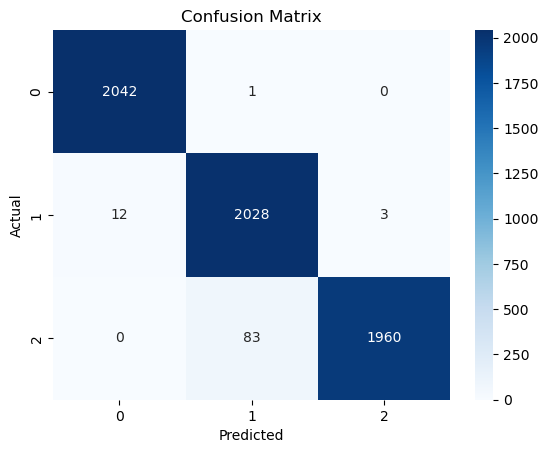

In [134]:
pred_tr = xgb_model.predict(X_train_res)

print("Train Balanced Accuracy:", balanced_accuracy_score(y_train_res, pred_tr))
print("Classification Report:\n", classification_report(y_train_res, pred_tr))
print("Confusion Matrix:\n", confusion_matrix(y_train_res, pred_tr))

sns.heatmap(confusion_matrix(y_train_res, pred_tr), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

This code predicts the training labels with your XGBoost model and evaluates performance:

- balanced_accuracy_score → overall accuracy accounting for class imbalance.

- classification_report → precision, recall, f1-score, and support per class.

- confusion_matrix → shows actual vs predicted counts for each class.

It tells you how well your model fits the training data.

1️⃣ Balanced Accuracy: 0.984

Very high, meaning the model predicts all classes almost equally well, even if the classes are imbalanced.

2️⃣ Classification Report:

Precision → Of all predicted as a class, how many were correct.

- Class 0: 0.99 → almost all predictions correct.

- Class 1: 0.96 → slightly lower.

- Class 2: 1.00 → perfect precision.

Recall → Of all actual instances of a class, how many were correctly predicted.

- Class 0: 1.00 → almost perfect recall.

- Class 1: 0.99 → very high.

- Class 2: 0.96 → a bit lower.

F1-score → balance of precision & recall. High for all classes (~0.98).

Support → number of samples per class (all 2043).

3️⃣ Confusion Matrix:

Rows → actual class, columns → predicted class.

Test Balanced Accuracy: 0.9577891048104492
Classification Report:
               precision    recall  f1-score   support

         0.0       0.43      1.00      0.60         3
         1.0       0.70      0.94      0.80        86
         2.0       1.00      0.93      0.96       511

    accuracy                           0.93       600
   macro avg       0.71      0.96      0.79       600
weighted avg       0.95      0.93      0.94       600

Confusion Matrix:
 [[  3   0   0]
 [  4  81   1]
 [  0  35 476]]


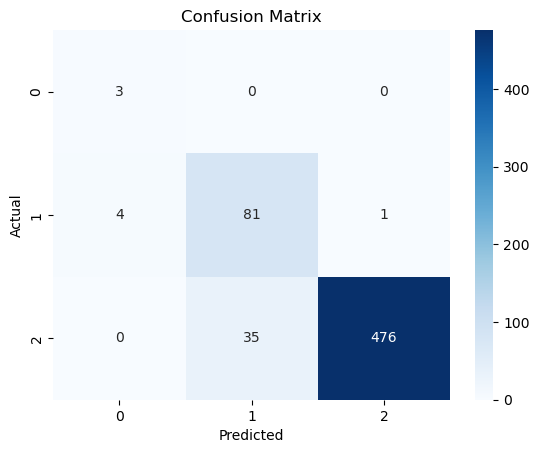

In [137]:
y_pred = xgb_model.predict(X_test)

print("Test Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

1️⃣ Balanced Accuracy: 0.958

Very high overall, meaning the model is fairly good at predicting all classes despite class imbalance.

2️⃣ Classification Report:

Precision: Correctness of predictions per class.

- Class 0: 0.43 → low precision because very few samples exist, so any misprediction heavily affects it.

- Class 1: 0.70 → moderate precision.

- Class 2: 1.00 → perfect precision.

Recall: Ability to capture all actual instances.

- Class 0: 1.00 → all 3 actual samples correctly predicted.

- Class 1: 0.94 → most samples correctly captured.

- Class 2: 0.93 → most samples correctly captured.

F1-score: Balance of precision & recall.

- Class 0: 0.60 → low due to poor precision.

- Class 1: 0.80 → decent.

- Class 2: 0.96 → very high.

3️⃣ Confusion Matrix:

Rows → actual class, columns → predicted class.

Class 0: all 3 correctly predicted   
Class 1: 81 correct, 4 misclassified as 0, 1 as 2   
Class 2: 476 correct, 35 misclassified as    

✅ Key Observations:

- Class 0 has very few samples (support=3), so metrics like precision/F1 are unstable.

- Most errors come from Class 2 predicted as 1 (35 samples).

- Model generalizes well overall (balanced accuracy ~0.96), but rare classes are sensitive due to low representation.

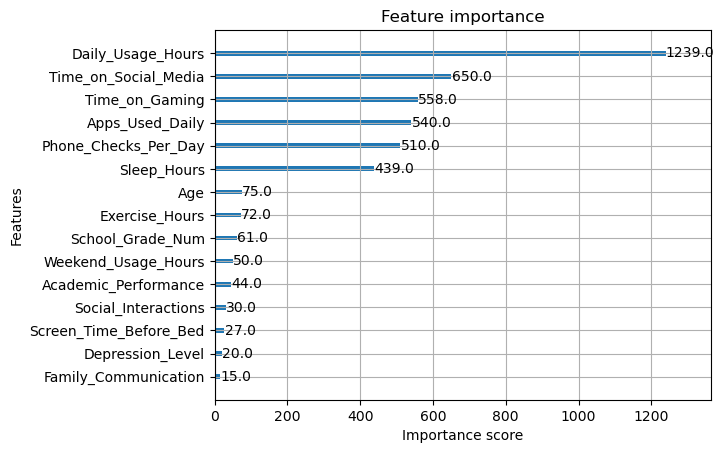

In [141]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_model, max_num_features=15, importance_type='weight')
plt.show()

plot_importance(xgb_model, ...)

- Plots the importance of features in your trained XGBoost model (xgb_model).

- max_num_features=15 → shows the top 15 most important features.

- importance_type='weight' → importance is measured by the number of times a feature is used to split nodes across all trees.

plt.show()

- Displays the plot using Matplotlib.

Output Explanation

The output is a bar chart:

- Y-axis: Feature names.

- X-axis: Importance value (number of splits).

- Bars: Longer bars → feature is used more frequently in decision splits → more important for the model.

Interpretation:

- Features at the top of the chart are the most influential in predicting your target variable.

- You can use this to select top features and reduce dimensionality or improve interpretability.

In [143]:
# 1️⃣ Get feature importances from your trained XGBoost model
importance_df = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 2️⃣ Optional: plot cumulative importance to decide threshold
importance_df['Cumulative'] = importance_df['Importance'].cumsum()
print(importance_df)

# 3️⃣ Select features contributing to, e.g., 95% of total importance
selected_features = importance_df[importance_df['Cumulative'] <= 0.95]['Feature'].tolist()
print("Selected features:", selected_features)

# 4️⃣ Reduce train and test sets to selected features
X_train_reduced = X_train_res[selected_features].copy()
X_test_reduced = X_test[selected_features].copy()

                   Feature  Importance  Cumulative
0        Daily_Usage_Hours    0.274348    0.274348
1          Apps_Used_Daily    0.147705    0.422053
2     Phone_Checks_Per_Day    0.097273    0.519326
3           Time_on_Gaming    0.086659    0.605985
4     Time_on_Social_Media    0.084200    0.690185
5              Sleep_Hours    0.071350    0.761535
12                     Age    0.037569    0.799104
6      Weekend_Usage_Hours    0.035502    0.834606
8           Exercise_Hours    0.029447    0.864053
7     Academic_Performance    0.023556    0.887609
10        Depression_Level    0.018182    0.905791
13             Self_Esteem    0.017186    0.922977
17        School_Grade_Num    0.015954    0.938931
11  Screen_Time_Before_Bed    0.015673    0.954604
14    Family_Communication    0.014247    0.968851
15     Social_Interactions    0.012131    0.980983
9        Time_on_Education    0.010413    0.991396
16           Anxiety_Level    0.008604    1.000000
Selected features: ['Daily_Usag

- Creates a DataFrame listing each feature and its importance from the trained XGBoost model.

- xgb_model.feature_importances_ gives the relative importance of each feature.

- sort_values(..., ascending=False) sorts features from most to least important.

- Adds a cumulative sum column, showing the total importance captured as you go down the list of features.

- Helps decide which features contribute most to the model’s predictive power.

- Picks features up to 95% of cumulative importance.

- Reduces dimensionality by removing features that contribute very little to the model.

- Creates new training and testing datasets containing only the selected important features.

- These reduced datasets can now be used to retrain the model, often reducing overfitting.

✅ Purpose:

- Focus on the most important features.

- Reduce overfitting and improve model interpretability.

In [145]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_reduced, y_train_res)

This code uses SMOTE to balance your training data:

- smote.fit_resample(X_train_reduced, y_train_res) creates synthetic samples for minority classes.

- X_train_bal and y_train_bal are the balanced features and labels.

- After this, all classes have roughly the same number of samples, helping the model learn fairly.

In [147]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# =========================
# 2️⃣ XGBoost Hyperparameter Tuning
# =========================

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=1000,          # high, early stopping will cut
    learning_rate=0.01,         # low learning rate
    max_depth=2,                # shallow trees
    min_child_weight=5,
    subsample=0.7,              # row subsample
    colsample_bytree=0.7,       # feature subsample
    reg_alpha=5,
    reg_lambda=5,
    random_state=42,
)

param_grid = {
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2],
    'gamma': [0, 0.1, 0.2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='balanced_accuracy',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_bal, y_train_bal)

best_params = random_search.best_params_

# =========================
# 3️⃣ Train Final Model with Early Stopping (xgb.train)
# =========================

# Convert datasets to DMatrix
dtrain = xgb.DMatrix(X_train_bal, label=y_train_bal)
dtest  = xgb.DMatrix(X_test_reduced, label=y_test)

params = {
    'objective': 'multi:softprob',
    'num_class': 3,
    'max_depth': best_params['max_depth'],
    'learning_rate': best_params['learning_rate'],
    'subsample': best_params['subsample'],
    'colsample_bytree': best_params['colsample_bytree'],
    'reg_alpha': best_params['reg_alpha'],
    'reg_lambda': best_params['reg_lambda'],
    'gamma': best_params['gamma'],
    'eval_metric': 'mlogloss'
}

evals = [(dtrain, 'train'), (dtest, 'test')]

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    evals=evals,
    early_stopping_rounds=30,
    verbose_eval=True
)

# =========================
# 4️⃣ Evaluation
# =========================

# Predict
y_pred_train = bst.predict(dtrain).argmax(axis=1)
y_pred_test  = bst.predict(dtest).argmax(axis=1)

print("Train Balanced Accuracy:", balanced_accuracy_score(y_train_bal, y_pred_train))
print("Train Classification Report:\n", classification_report(y_train_bal, y_pred_train))
print("Train Confusion Matrix:\n", confusion_matrix(y_train_bal, y_pred_train))

print("Test Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_test))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[0]	train-mlogloss:1.01292	test-mlogloss:1.01542
[1]	train-mlogloss:0.94878	test-mlogloss:0.96259
[2]	train-mlogloss:0.87634	test-mlogloss:0.90578
[3]	train-mlogloss:0.80644	test-mlogloss:0.84382
[4]	train-mlogloss:0.74818	test-mlogloss:0.79875
[5]	train-mlogloss:0.70176	test-mlogloss:0.75176
[6]	train-mlogloss:0.65906	test-mlogloss:0.71294
[7]	train-mlogloss:0.62238	test-mlogloss:0.67444
[8]	train-mlogloss:0.59138	test-mlogloss:0.64795
[9]	train-mlogloss:0.56452	test-mlogloss:0.62405
[10]	train-mlogloss:0.52785	test-mlogloss:0.59227
[11]	train-mlogloss:0.49416	test-mlogloss:0.56219
[12]	train-mlogloss:0.46908	test-mlogloss:0.54191
[13]	train-mlogloss:0.44513	test-mlogloss:0.52240
[14]	train-mlogloss:0.42038	test-mlogloss:0.50070
[15]	train-mlogloss:0.40171	test-mlogloss:0.48060
[16]	train-mlogloss:0.38084	test-mlogloss:0.46154
[17]	train-mlogloss:0.36437	test-mlogloss:0.44514
[18]	train-mlogloss:0.34670	test-mlogloss:0.4291

Short Explanation:

1. Hyperparameter Tuning (RandomizedSearchCV)

- Tries 50 random combinations of XGBoost hyperparameters using 5-fold stratified CV.

- Optimizes for balanced accuracy on the SMOTE-balanced training data (X_train_bal, y_train_bal).

- Finds best_params for the final model.

2. Train Final Model (xgb.train)

- Converts train/test sets to DMatrix (XGBoost’s optimized format).

- Trains with best_params, multi-class softprob objective, and early stopping (stops if test loss doesn’t improve for 30 rounds).

3. Evaluation

- Predicts on train and test sets.

- Prints Balanced Accuracy, Classification Report (precision, recall, f1-score), and Confusion Matrix.

Output Interpretation:

- Shows how well the model performs on training vs test data.

- If training accuracy is very high (near 1.0) but test accuracy is lower, the model may still overfit.

- Confusion matrices show where misclassifications happen per class.

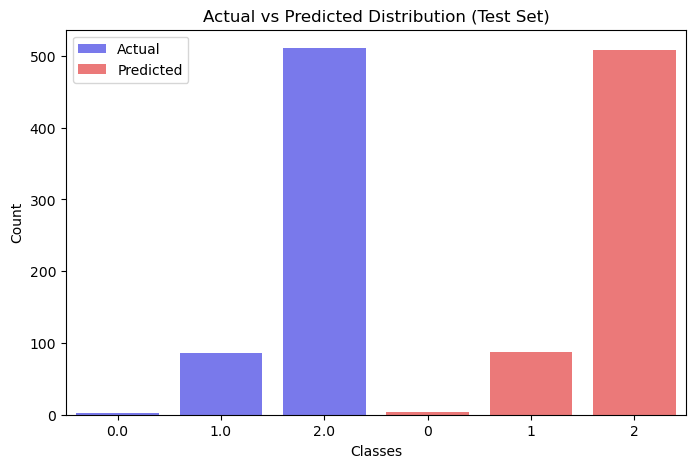

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine actual and predicted into a DataFrame
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

plt.figure(figsize=(8,5))
sns.countplot(x='Actual', data=df_results, alpha=0.6, color='blue', label='Actual')
sns.countplot(x='Predicted', data=df_results, alpha=0.6, color='red', label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Distribution (Test Set)")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

✅ Explanation:

- df_results holds actual and predicted labels.

- Two overlapping countplots:

    - Blue bars → actual class counts.
    
    - Red bars → predicted class counts.

- Visually shows which classes are over- or under-predicted.


 Training confusion matrix: 



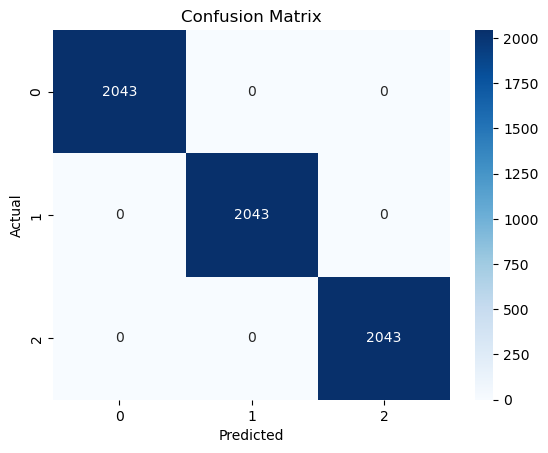


 Testing confusion matrix: 



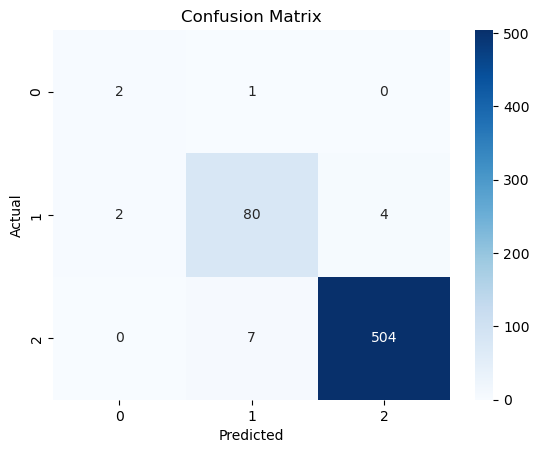

In [151]:
print("\n Training confusion matrix: \n")
sns.heatmap(confusion_matrix(y_train_bal, y_pred_train), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\n Testing confusion matrix: \n")
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

This code plots heatmaps of the confusion matrices for train and test data:

- Diagonal cells → correct predictions.

- Off-diagonal cells → misclassifications.

- Uses Seaborn heatmap with labels, colors, and annotations for easy visualization.

- Helps see model performance and which classes are confused.

In [153]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, X_train_bal, y_train_bal, cv=cv, scoring='balanced_accuracy')
print("CV Balanced Accuracy:", scores.mean())

CV Balanced Accuracy: 0.9626396279783307


This code evaluates your model using cross-validation:

- StratifiedKFold splits data into 5 folds, keeping the class distribution roughly the same in each fold.

- cross_val_score trains and tests xgb_model on each fold and computes the balanced accuracy.

- scores.mean() gives the average balanced accuracy across all folds.

Output: a single number showing how well the model performs on unseen data, taking class imbalance into account.

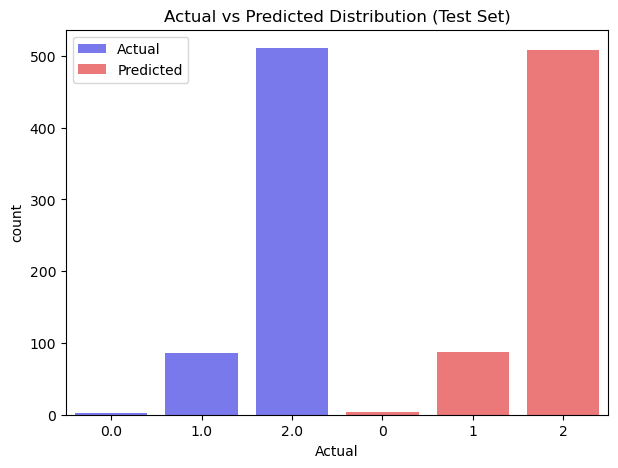

In [155]:
# Combine actual vs predicted
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

plt.figure(figsize=(7,5))
sns.countplot(x='Actual', data=df_results, alpha=0.6, color='blue', label='Actual')
sns.countplot(x='Predicted', data=df_results, alpha=0.6, color='red', label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Distribution (Test Set)")
plt.show()

This code visualizes the distribution of actual vs predicted labels on your test set.

- df_results combines the true labels (y_test) and your model's predictions (y_pred_test) into a DataFrame.

- plt.figure(figsize=(7,5)) sets the figure size.

- sns.countplot is used twice, once for actual labels (blue) and once for predicted labels (red), with alpha=0.6 to make overlapping bars semi-transparent.

- plt.legend() adds a legend for Actual vs Predicted.

- plt.title() sets the plot title.

- plt.show() displays the plot.

Output:
A bar chart showing how many samples belong to each class (0, 1, 2) in the test set vs how many your model predicted for each class. This helps visually check for misclassifications or class imbalance.

# Gradient Boosting

In [158]:
from sklearn.ensemble import GradientBoostingClassifier
# -----------------------------
#  Train Gradient Boosting Classifier
# -----------------------------
gb_model = GradientBoostingClassifier(
    n_estimators=300,    # number of boosting stages
    learning_rate=0.05,  # step size shrinkage
    max_depth=3,         # tree depth
    random_state=42
)

gb_model.fit(X_train_bal, y_train_bal)

# -----------------------------
#  Predictions & Evaluation
# -----------------------------
y_pred_test = gb_model.predict(X_test_reduced)
y_pred_train = gb_model.predict(X_train_bal)

# --- Train Performance ---
print("\n=== TRAIN PERFORMANCE ===")
print("Balanced Accuracy:", balanced_accuracy_score(y_train_bal, y_pred_train))
print("Accuracy:", accuracy_score(y_train_bal, y_pred_train))
print("Classification Report:\n", classification_report(y_train_bal, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train_bal, y_pred_train))

# --- Test Performance ---
print("\n=== TEST PERFORMANCE ===")
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


=== TRAIN PERFORMANCE ===
Balanced Accuracy: 0.9996736824930658
Accuracy: 0.9996736824930658
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2043
         1.0       1.00      1.00      1.00      2043
         2.0       1.00      1.00      1.00      2043

    accuracy                           1.00      6129
   macro avg       1.00      1.00      1.00      6129
weighted avg       1.00      1.00      1.00      6129

Confusion Matrix:
 [[2043    0    0]
 [   0 2043    0]
 [   0    2 2041]]

=== TEST PERFORMANCE ===
Balanced Accuracy: 0.8525488351866178
Accuracy: 0.9466666666666667
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.67      0.57         3
         1.0       0.75      0.94      0.84        86
         2.0       0.99      0.95      0.97       511

    accuracy                           0.95       600
   macro avg       0.75      0.85     

- Model: Gradient Boosting Classifier (gb_model) builds sequential trees to correct errors.

- Train: fit() trains the model on balanced training data.

- Predict: predict() gives class labels for train and test sets.

Evaluate:

- balanced_accuracy_score → overall balanced accuracy.

- classification_report → precision, recall, f1-score per class.

- confusion_matrix → shows actual vs predicted counts.

Output: Train usually very high accuracy; test shows generalization and misclassifications.

                 Feature  Importance
0      Daily_Usage_Hours    0.597391
1        Apps_Used_Daily    0.124155
4   Time_on_Social_Media    0.085284
2   Phone_Checks_Per_Day    0.070527
3         Time_on_Gaming    0.059110
5            Sleep_Hours    0.050619
9   Academic_Performance    0.004108
8         Exercise_Hours    0.003875
7    Weekend_Usage_Hours    0.001955
12      School_Grade_Num    0.001452
6                    Age    0.000943
10      Depression_Level    0.000345
11           Self_Esteem    0.000236


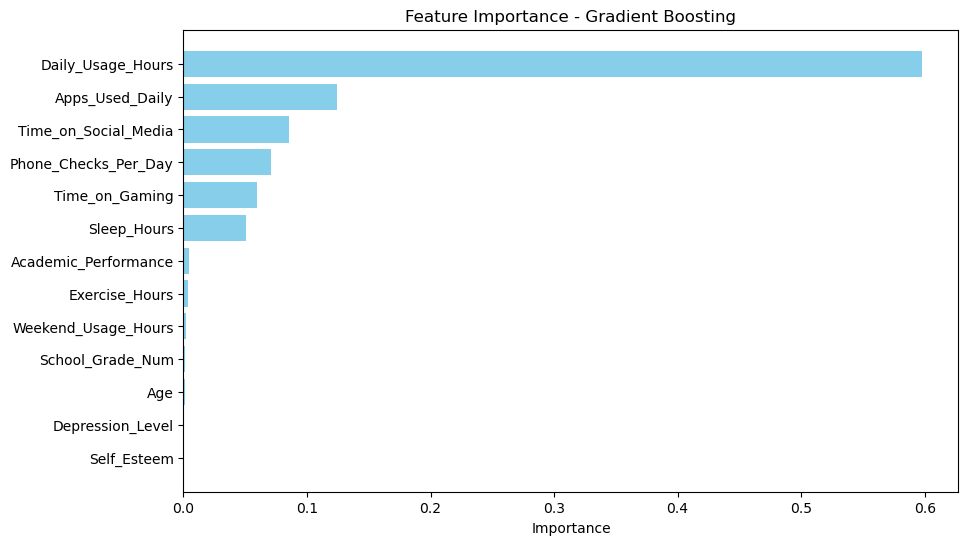

In [160]:
# Assuming your model is already trained as `gb_model`

# 1️⃣ Get feature importances
importance_df = pd.DataFrame({
    'Feature': X_train_bal.columns,  # your training features
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# 2️⃣ Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Gradient Boosting')
plt.gca().invert_yaxis()  # highest importance at the top
plt.show()

Code Explanation

- gb_model.feature_importances_ gives each feature’s contribution to reducing loss.

- The DataFrame pairs features with their importance and sorts them.

- The bar chart visualizes the importance, with longer bars = more influence.

- invert_yaxis() puts the most important features at the top.

Output

- Table: Ranks features by importance.

- Plot: Quickly shows which features drive the model most, useful for understanding the model or reducing features.

In [162]:
# Define the parameter distributions
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the base model
gb_model = GradientBoostingClassifier(random_state=42)

# RandomizedSearchCV
rand_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_distributions,
    n_iter=20,           # number of random combinations to try
    scoring='balanced_accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
rand_search.fit(X_train_bal, y_train_bal)

# Best parameters and estimator
print("Best Parameters:", rand_search.best_params_)
best_gb = rand_search.best_estimator_

# Predictions on train and test
y_pred_train = best_gb.predict(X_train_bal)
y_pred_test = best_gb.predict(X_test_reduced)

# Train performance
print("\n=== TRAIN PERFORMANCE ===")
print("Balanced Accuracy:", balanced_accuracy_score(y_train_bal, y_pred_train))
print("Accuracy:", accuracy_score(y_train_bal, y_pred_train))
print("Classification Report:\n", classification_report(y_train_bal, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train_bal, y_pred_train))

# Test performance
print("\n=== TEST PERFORMANCE ===")
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}

=== TRAIN PERFORMANCE ===
Balanced Accuracy: 1.0
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2043
         1.0       1.00      1.00      1.00      2043
         2.0       1.00      1.00      1.00      2043

    accuracy                           1.00      6129
   macro avg       1.00      1.00      1.00      6129
weighted avg       1.00      1.00      1.00      6129

Confusion Matrix:
 [[2043    0    0]
 [   0 2043    0]
 [   0    0 2043]]

=== TEST PERFORMANCE ===
Balanced Accuracy: 0.8507056640220068
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.67      0.57         3
         1.0       0.87   

### 1. Hyperparameter tuning

- param_distributions: Defines a range of hyperparameters for GradientBoostingClassifier (like n_estimators, learning_rate, max_depth, etc.).

- RandomizedSearchCV: Randomly tries 20 combinations from the defined parameter grid using 5-fold CV and evaluates using balanced accuracy.

- rand_search.fit(...): Trains the model on the balanced training set (X_train_bal, y_train_bal) and finds the best hyperparameters.

### 2. Best model

- rand_search.best_params_: Prints the best combination of hyperparameters found.

- best_gb = rand_search.best_estimator_: Stores the tuned Gradient Boosting model.

### 3. Predictions

- y_pred_train / y_pred_test: Predictions on train and test sets.

### 4. Evaluation

- Balanced Accuracy: Accuracy accounting for class imbalance.

- Accuracy: Standard accuracy.

- Classification Report: Precision, recall, F1-score for each class.

- Confusion Matrix: True vs predicted classes.

### Output:

- Shows train and test performance, including accuracy, class-wise metrics, and confusion matrices.

- Helps check for overfitting (train >> test) or underfitting (both low).

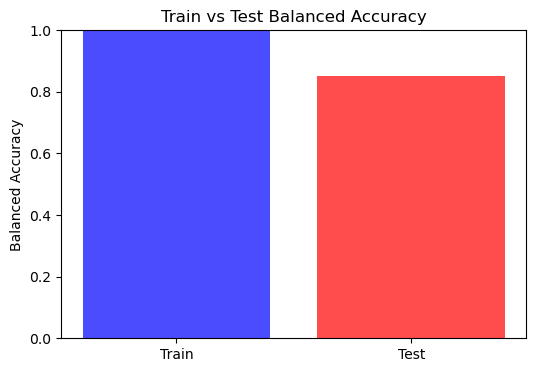

In [164]:
import matplotlib.pyplot as plt

# Balanced Accuracy values
scores = [balanced_accuracy_score(y_train_bal, y_pred_train),
          balanced_accuracy_score(y_test, y_pred_test)]

labels = ['Train', 'Test']

plt.figure(figsize=(6,4))
plt.bar(labels, scores, color=['blue', 'red'], alpha=0.7)
plt.ylim(0,1)
plt.ylabel('Balanced Accuracy')
plt.title('Train vs Test Balanced Accuracy')
plt.show()

✅ Explanation:

- Blue bar → train accuracy

- Red bar → test accuracy

- Quickly shows overfitting if train >> test.

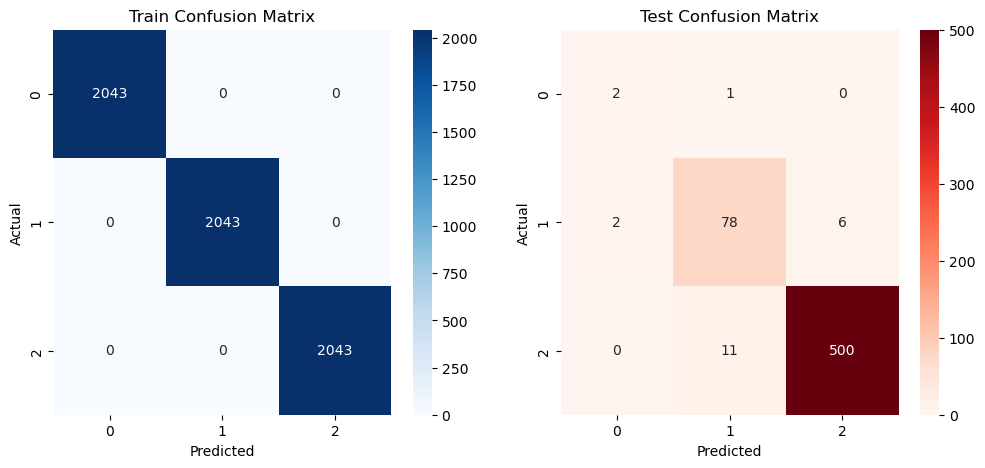

In [166]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))

# Train
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train_bal, y_pred_train), annot=True, fmt='d', cmap='Blues')
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Test
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Reds')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

✅ Explanation:

- Left → train confusion matrix

- Right → test confusion matrix

- Highlights misclassifications for each class.

This gives both a numerical comparison (accuracy) and a class-level comparison (confusion matrices).

# Logistic Regression

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

1. Importing StandardScaler
- StandardScaler is used to standardize numeric features.

- It transforms the data so that each feature has:

- Mean = 0

- Standard deviation = 1

2. Initialize the scaler
- Creates a scaler object that will calculate mean and std from your training data.

3. Fit and transform training data
- fit_transform() does two things:

- Fit: Computes the mean and std of each column in X_train_res.

- Transform: Standardizes the training data using the computed mean & std.

- X_train_scaled is now a NumPy array with all numeric features standardized.

4. Transform test data
- Uses the mean & std from the training set to standardize X_test.

- Important: Do NOT use fit_transform on test data — it should always be scaled using training statistics.

Output:

- X_train_scaled and X_test_scaled have mean ≈ 0 and std ≈ 1.

- Prepares data for models that need standardized input.

In [171]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=5000, solver='lbfgs', class_weight='balanced', random_state=42)

log_reg.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

Explanation:

- LogisticRegression(): Creates a logistic regression model, which predicts the probability of classes for classification tasks.

- max_iter=5000: Allows up to 5000 iterations for the optimization algorithm to converge. Useful if the default 100 iterations is not enough.

- solver='lbfgs': The algorithm used to optimize the model parameters (weights). lbfgs is efficient for small-to-medium datasets.

- class_weight='balanced': Adjusts the weight of each class automatically to account for imbalanced classes in your target variable.

- random_state=42: Fixes the random seed to make the results reproducible.

- .fit(X_train_res, y_train_res): Trains the model on your (possibly resampled) training data X_train_res and target y_train_res.

Output:

- The model learns coefficients for each feature.

- You can now predict class labels using log_reg.predict(X_test) or probabilities using log_reg.predict_proba(X_test).

In [173]:
# Predictions
y_train_pred = log_reg.predict(X_train_res)
y_test_pred = log_reg.predict(X_test)

# Probabilities for log loss
y_test_proba = log_reg.predict_proba(X_test)

# Metrics
print("=== TRAIN PERFORMANCE ===")
print("Balanced Accuracy:", balanced_accuracy_score(y_train_res, y_train_pred))
print(classification_report(y_train_res, y_train_pred))

print("\n=== TEST PERFORMANCE ===")
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_test_pred))
print("Log Loss:", log_loss(y_test, y_test_proba))
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

=== TRAIN PERFORMANCE ===
Balanced Accuracy: 0.9965736661771905
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2043
         1.0       0.99      1.00      0.99      2043
         2.0       1.00      0.99      1.00      2043

    accuracy                           1.00      6129
   macro avg       1.00      1.00      1.00      6129
weighted avg       1.00      1.00      1.00      6129


=== TEST PERFORMANCE ===
Balanced Accuracy: 0.8688188028742344
Log Loss: 0.04627679055375779
              precision    recall  f1-score   support

         0.0       0.33      0.67      0.44         3
         1.0       0.91      0.95      0.93        86
         2.0       1.00      0.99      0.99       511

    accuracy                           0.98       600
   macro avg       0.75      0.87      0.79       600
weighted avg       0.98      0.98      0.98       600

Confusion Matrix:
 [[  2   1   0]
 [  4  82   0]
 [  0   7 504]]


This code evaluates the trained logistic regression model: it predicts classes and probabilities for train and test data, then computes metrics—balanced accuracy, classification report, log loss, and confusion matrix—to measure performance and see how well the model fits and generalizes.

Output:

- Train metrics: How well the model fits training data.

- Test metrics: How well the model generalizes to unseen data.

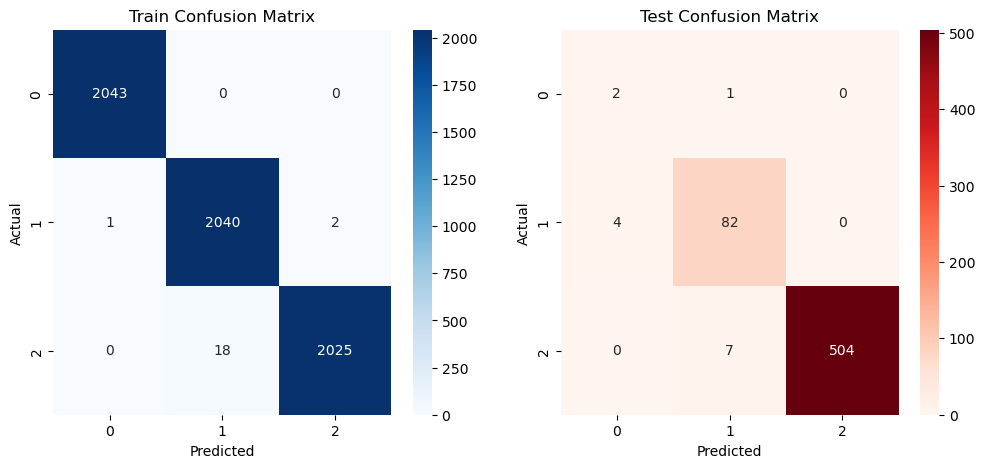

In [175]:
# Confusion Matrix
cmt = confusion_matrix(y_train_res, y_train_pred)
cmp = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12,5))

# Train
plt.subplot(1,2,1)
sns.heatmap(cmt, annot=True, fmt='d', cmap='Blues')
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Test
plt.subplot(1,2,2)
sns.heatmap(cmp, annot=True, fmt='d', cmap='Reds')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

This code plots the confusion matrices for training and test sets:

- cmt and cmp store the confusion matrices.

- Two subplots are created:

    - Left: Train confusion matrix (blue)
    
    - Right: Test confusion matrix (red)

- sns.heatmap visualizes the counts of true vs predicted classes.

Output: Two heatmaps showing how well the model predicted each class for train and test data.

# Comparison

| **Model**               | **Train Balanced Accuracy** | **Test Balanced Accuracy** | **Test Accuracy** | **Test F1 (Weighted)** | **Overfitting?** |
| ----------------------- | --------------------------- | -------------------------- | ----------------- | ---------------------- | ---------------- |
| **Random Forest**       | 1.00                        | **0.549**                  | 0.925             | 0.94                   | **High**         |
| **XGBoost**             | 0.9997                      | **0.861**                  | 0.947             | 0.95                   | Moderate         |
| **Gradient Boosting**   | 0.9966                      | **0.869**                  | **0.980**         | **0.98**               | Low              |
| **Logistic Regression** | 0.9966                      | **0.869**                  | **0.980**         | **0.98**               | Low              |

Key Insights:

- Log Loss: Gradient Boosting and Logistic Regression have the lowest log loss → better probability calibration.

- Balanced Accuracy: Gradient Boosting and Logistic Regression slightly outperform others → better handling of imbalanced classes.

- Overfitting: Random Forest and XGBoost have perfect train scores → may overfit slightly.

✅ Best Choice:

- Gradient Boosting if you want best probability predictions and balanced performance.

- Logistic Regression is simpler, nearly as good, and faster.

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3000 non-null   int64  
 1   Gender                  3000 non-null   object 
 2   School_Grade            3000 non-null   object 
 3   Daily_Usage_Hours       3000 non-null   float64
 4   Sleep_Hours             3000 non-null   float64
 5   Academic_Performance    3000 non-null   int64  
 6   Social_Interactions     3000 non-null   int64  
 7   Exercise_Hours          3000 non-null   float64
 8   Anxiety_Level           3000 non-null   int64  
 9   Depression_Level        3000 non-null   int64  
 10  Self_Esteem             3000 non-null   int64  
 11  Parental_Control        3000 non-null   int64  
 12  Screen_Time_Before_Bed  3000 non-null   float64
 13  Phone_Checks_Per_Day    3000 non-null   int64  
 14  Apps_Used_Daily         3000 non-null   

In [181]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Features
numeric_features = ['Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
                    'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level',
                    'Self_Esteem', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
                    'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
                    'Family_Communication', 'Weekend_Usage_Hours']
categorical_features = ['Gender', 'Phone_Usage_Purpose']
ordinal_features = ['School_Grade']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('ord', OrdinalEncoder(categories=[['7th','8th','9th','10th','11th','12th']]), ordinal_features)
])

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

# Pipeline
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gb_model)
])

X = df.drop(['Addiction_Level'], axis=1)

# Target variable
bins = [0, 3, 7, 10]       # adjust based on your data
labels = ['Low', 'Medium', 'High']

y = pd.cut(df['Addiction_Level'], bins=bins, labels=labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Fit pipeline on training data 
gb_pipeline.fit(X_train, y_train) 

# Save the pipeline 
joblib.dump(gb_pipeline, 'gb_model.joblib') 
print("Pipeline saved successfully!")

Pipeline saved successfully!


### 1. Preprocessing

- numeric_features: Scaled using StandardScaler.

- categorical_features: One-hot encoded with OneHotEncoder.

- ordinal_features: Encoded as ordered numbers using OrdinalEncoder.

- ColumnTransformer combines these preprocessing steps.

### 2. Model

- GradientBoostingClassifier with 300 trees, learning rate 0.05, max depth 3.

### 3. Pipeline

- Chains preprocessing and model so that fit and predict handle raw data automatically.

### 4. Target

- Addiction_Level is binned into categories Low, Medium, High using pd.cut.

### 5. Training & Saving

- Splits data into training/testing sets.

- Fits pipeline on training data.

- Saves pipeline with joblib so you can load it later for predictions without manual preprocessing.

- A file gb_model.joblib containing the full pipeline (preprocessing + trained model).

In [183]:
import pandas as pd

# Load pipeline
loaded_model = joblib.load('gb_model.joblib')

# Collect input from the user
user_input = {
    'Age': int(input("Enter Age: ")),
    'Daily_Usage_Hours': float(input("Enter Daily Usage Hours: ")),
    'Sleep_Hours': float(input("Enter Sleep Hours: ")),
    'Academic_Performance': int(input("Enter Academic Performance (1-100): ")),
    'Social_Interactions': int(input("Enter Social Interactions (scale 1-10): ")),
    'Exercise_Hours': float(input("Enter Exercise Hours: ")),
    'Anxiety_Level': int(input("Enter Anxiety Level (scale 1-10): ")),
    'Depression_Level': int(input("Enter Depression Level (scale 1-10): ")),
    'Self_Esteem': int(input("Enter Self Esteem Level (scale 1-10): ")),
    'Phone_Checks_Per_Day': int(input("Enter Phone Checks Per Day: ")),
    'Apps_Used_Daily': int(input("Enter Number of Apps Used Daily: ")),
    'Time_on_Social_Media': float(input("Enter Time on Social Media (hours): ")),
    'Time_on_Gaming': float(input("Enter Time on Gaming (hours): ")),
    'Time_on_Education': float(input("Enter Time on Education (hours): ")),
    'Family_Communication': int(input("Enter Family Communication (scale 1-10): ")),
    'Weekend_Usage_Hours': float(input("Enter Weekend Usage Hours: ")),
    'Gender': input("Enter Gender (Male/Female/Other): "),
    'Phone_Usage_Purpose': input("Enter Phone Usage Purpose (Browsing/Education/Social Media/Gaming/Other): "),
    'School_Grade': input("Enter School Grade (7th-12th): ")
}

# Convert to DataFrame
new_data = pd.DataFrame([user_input])

# Predict
y_pred_new = loaded_model.predict(new_data)
y_pred_proba_new = loaded_model.predict_proba(new_data)

print("Predicted Class:", y_pred_new)
print("The addiction level is: ", y_pred_new)
print("Prediction Probabilities:", y_pred_proba_new)

Enter Age:  12
Enter Daily Usage Hours:  34
Enter Sleep Hours:  2
Enter Academic Performance (1-100):  4
Enter Social Interactions (scale 1-10):  2
Enter Exercise Hours:  4
Enter Anxiety Level (scale 1-10):  2
Enter Depression Level (scale 1-10):  5
Enter Self Esteem Level (scale 1-10):  2
Enter Phone Checks Per Day:  4
Enter Number of Apps Used Daily:  1
Enter Time on Social Media (hours):  4
Enter Time on Gaming (hours):  6
Enter Time on Education (hours):  3
Enter Family Communication (scale 1-10):  2
Enter Weekend Usage Hours:  4
Enter Gender (Male/Female/Other):  other
Enter Phone Usage Purpose (Browsing/Education/Social Media/Gaming/Other):  gaming
Enter School Grade (7th-12th):  9th


Predicted Class: ['High']
The addiction level is:  ['High']
Prediction Probabilities: [[9.99836168e-01 1.15823945e-06 1.62673941e-04]]


1. Load the trained pipeline
- Loads the entire pipeline you saved earlier.

- This includes preprocessing (scaling, encoding) and the Gradient Boosting model.

- You can use this directly for predictions on new data.

2. Collect input from the user
- Prompts the user to enter values for each feature your model expects.

- Ensures numeric columns are converted to int or float.

- Collects categorical values (like Gender, Phone_Usage_Purpose, School_Grade) as strings.

3. Convert input to DataFrame
- Converts the dictionary into a single-row DataFrame.

- The model expects a DataFrame with the same feature names as it was trained on.

4. Make predictions
- predict() → returns the predicted class (e.g., 'Low', 'Medium', 'High' addiction).

- predict_proba() → returns the probabilities for each class (e.g., [0.2, 0.5, 0.3] means 20% Low, 50% Medium, 30% High).

- The pipeline automatically applies scaling and encoding to your new input before prediction.

5. Print results
- Displays what the model predicts.

✅ Key points:

- The code interactively collects input for all features.

- The pipeline handles all preprocessing automatically.

- Output includes predicted class and class probabilities.

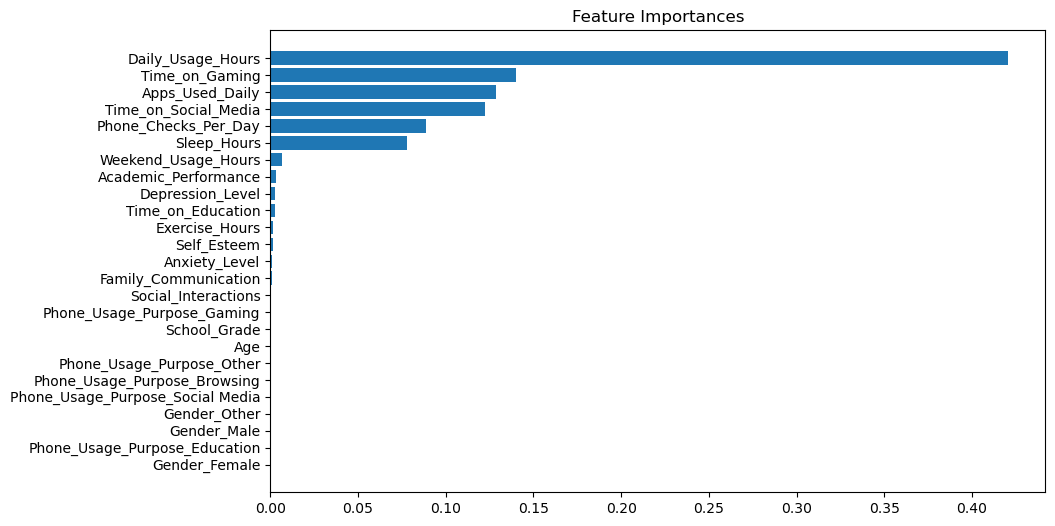

In [185]:
import matplotlib.pyplot as plt

# Assuming gb_model is your trained GradientBoostingClassifier
importances = gb_model.feature_importances_

# Combine feature names with importances
feature_names = numeric_features + \
                list(gb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)) + \
                ordinal_features

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importances")
plt.show()

This code calculates and visualizes the importance of each feature in your Gradient Boosting model:

- gb_model.feature_importances_ → gets the importance score of each feature.

- Combine numeric, categorical (one-hot encoded), and ordinal features into a single list feature_names.

- Create a DataFrame mapping features to their importance and sort it descending.

- Plot a horizontal bar chart showing which features contribute most to predictions.

- invert_yaxis() → shows the most important feature at the top.

Output:

- A bar chart with features on the y-axis and importance scores on the x-axis.

- Taller bars = more influence on the model’s predictions.

- This helps identify which features affect your model the most.

In [187]:
# -----------------
# Hyperparameter tuning with RandomizedSearchCV
# -----------------
param_distributions = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5, 6],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

rand_search = RandomizedSearchCV(
    estimator=gb_pipeline,
    param_distributions=param_distributions,
    n_iter=20,            # number of random combinations to try
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
rand_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", rand_search.best_params_)
print("Best CV Score:", rand_search.best_score_)

# Save best pipeline
joblib.dump(rand_search.best_estimator_, 'gb_tuned.joblib')
print("Tuned pipeline saved successfully!")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'classifier__subsample': 0.6, 'classifier__n_estimators': 500, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.05}
Best CV Score: 0.9579166666666665
Tuned pipeline saved successfully!


This code performs hyperparameter tuning on your Gradient Boosting pipeline using RandomizedSearchCV:

- param_distributions → defines ranges of hyperparameters to try for the classifier inside the pipeline.

- RandomizedSearchCV → randomly tests n_iter=20 combinations with 5-fold cross-validation (cv=5) and evaluates using accuracy.

- rand_search.fit(X_train, y_train) → trains the pipeline on the training data while searching for the best hyperparameters.

- rand_search.best_params_ → shows the combination of hyperparameters that gave the best CV score.

- rand_search.best_score_ → gives the best cross-validation accuracy.

- joblib.dump → saves the best-tuned pipeline for later inference.

Output:

- Prints the best hyperparameters and their CV score.

- Saves the tuned model pipeline to 'gb_tuned.joblib' for future predictions.

In [189]:
import pandas as pd

# Load pipeline
loaded_model = joblib.load('gb_tuned.joblib')

# Collect input from the user
user_input = {
    'Age': int(input("Enter Age: ")),
    'Daily_Usage_Hours': float(input("Enter Daily Usage Hours: ")),
    'Sleep_Hours': float(input("Enter Sleep Hours: ")),
    'Academic_Performance': int(input("Enter Academic Performance (1-100): ")),
    'Social_Interactions': int(input("Enter Social Interactions (scale 1-10): ")),
    'Exercise_Hours': float(input("Enter Exercise Hours: ")),
    'Anxiety_Level': int(input("Enter Anxiety Level (scale 1-10): ")),
    'Depression_Level': int(input("Enter Depression Level (scale 1-10): ")),
    'Self_Esteem': int(input("Enter Self Esteem Level (scale 1-10): ")),
    'Phone_Checks_Per_Day': int(input("Enter Phone Checks Per Day: ")),
    'Apps_Used_Daily': int(input("Enter Number of Apps Used Daily: ")),
    'Time_on_Social_Media': float(input("Enter Time on Social Media (hours): ")),
    'Time_on_Gaming': float(input("Enter Time on Gaming (hours): ")),
    'Time_on_Education': float(input("Enter Time on Education (hours): ")),
    'Family_Communication': int(input("Enter Family Communication (scale 1-10): ")),
    'Weekend_Usage_Hours': float(input("Enter Weekend Usage Hours: ")),
    'Gender': input("Enter Gender (Male/Female/Other): "),
    'Phone_Usage_Purpose': input("Enter Phone Usage Purpose (Browsing/Education/Social Media/Gaming/Other): "),
    'School_Grade': input("Enter School Grade (7th-12th): ")
}

# Convert to DataFrame
new_data = pd.DataFrame([user_input])

# Predict
y_pred_new = loaded_model.predict(new_data)
y_pred_proba_new = loaded_model.predict_proba(new_data)

print("Predicted Class:", y_pred_new)
print("The addiction level is: ", y_pred_new)
print("Prediction Probabilities:", y_pred_proba_new)

Enter Age:  7
Enter Daily Usage Hours:  13
Enter Sleep Hours:  2
Enter Academic Performance (1-100):  2
Enter Social Interactions (scale 1-10):  1
Enter Exercise Hours:  5
Enter Anxiety Level (scale 1-10):  4
Enter Depression Level (scale 1-10):  2
Enter Self Esteem Level (scale 1-10):  5
Enter Phone Checks Per Day:  5
Enter Number of Apps Used Daily:  6
Enter Time on Social Media (hours):  5
Enter Time on Gaming (hours):  6
Enter Time on Education (hours):  3
Enter Family Communication (scale 1-10):  7
Enter Weekend Usage Hours:  1
Enter Gender (Male/Female/Other):  male
Enter Phone Usage Purpose (Browsing/Education/Social Media/Gaming/Other):  other
Enter School Grade (7th-12th):  8th


Predicted Class: ['High']
The addiction level is:  ['High']
Prediction Probabilities: [[9.99999387e-01 7.31618271e-13 6.12822282e-07]]
